<a href="https://colab.research.google.com/github/yash1thsa/machine_learning_pipelines/blob/main/INN_ReneWind_Main_Project_FullCode_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

## Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).

## Objective

“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description

The data provided is a transformed version of the original data which was collected using sensors.

- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.

Both the datasets consist of 40 predictor variables and 1 target variable.

# **Installing and Importing the necessary libraries**

In [310]:
# Installing the libraries with the specified version
!pip install --no-deps tensorflow==2.18.0 scikit-learn==1.3.2 matplotlib===3.8.3 seaborn==0.13.2 numpy==1.26.4 pandas==2.2.2 -q --user --no-warn-script-location

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

# **Loading the Data**

In [312]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [313]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
#Imports metrics from
from sklearn import metrics
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend
from tensorflow.keras.optimizers.schedules import CosineDecay

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")


from imblearn.over_sampling import SMOTE

In [314]:
df = pd.read_csv('/content/drive/MyDrive/Train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Test.csv')

In [315]:
data = df.copy()

In [316]:
data_test = df_test.copy()

# **Data Overview**

In [317]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.464606,-4.679129,3.101546,0.506130,-0.221083,-2.032511,-2.910870,0.050714,-1.522351,3.761892,...,3.059700,-1.690440,2.846296,2.235198,6.667486,0.443809,-2.369169,2.950578,-3.480324,0
1,3.365912,3.653381,0.909671,-1.367528,0.332016,2.358938,0.732600,-4.332135,0.565695,-0.101080,...,-1.795474,3.032780,-2.467514,1.894599,-2.297780,-1.731048,5.908837,-0.386345,0.616242,0
2,-3.831843,-5.824444,0.634031,-2.418815,-1.773827,1.016824,-2.098941,-3.173204,-2.081860,5.392621,...,-0.257101,0.803550,4.086219,2.292138,5.360850,0.351993,2.940021,3.839160,-4.309402,0
3,1.618098,1.888342,7.046143,-1.147285,0.083080,-1.529780,0.207309,-2.493629,0.344926,2.118578,...,-3.584425,-2.577474,1.363769,0.622714,5.550100,-1.526796,0.138853,3.101430,-1.277378,0
4,-0.111440,3.872488,-3.758361,-2.982897,3.792714,0.544960,0.205433,4.848994,-1.854920,-6.220023,...,8.265896,6.629213,-10.068689,1.222987,-3.229763,1.686909,-2.163896,-3.644622,6.510338,0


In [318]:
data_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613489,-3.819640,2.202302,1.300420,-1.184929,-4.495964,-1.835817,4.722989,1.206140,-0.341909,...,2.291204,-5.411388,0.870073,0.574479,4.157191,1.428093,-10.511342,0.454664,-1.448363,0
1,0.389608,-0.512341,0.527053,-2.576776,-1.016766,2.235112,-0.441301,-4.405744,-0.332869,1.966794,...,-2.474936,2.493582,0.315165,2.059288,0.683859,-0.485452,5.128350,1.720744,-1.488235,0
2,-0.874861,-0.640632,4.084202,-1.590454,0.525855,-1.957592,-0.695367,1.347309,-1.732348,0.466500,...,-1.318888,-2.997464,0.459664,0.619774,5.631504,1.323512,-1.752154,1.808302,1.675748,0
3,0.238384,1.458607,4.014528,2.534478,1.196987,-3.117330,-0.924035,0.269493,1.322436,0.702345,...,3.517918,-3.074085,-0.284220,0.954576,3.029331,-1.367198,-3.412140,0.906000,-2.450889,0
4,5.828225,2.768260,-1.234530,2.809264,-1.641648,-1.406698,0.568643,0.965043,1.918379,-2.774855,...,1.773841,-1.501573,-2.226702,4.776830,-6.559698,-0.805551,-0.276007,-3.858207,-0.537694,0


In [319]:
data.shape

(20000, 41)

In [320]:
data_test.shape

(5000, 41)

In [321]:
pd.isnull(data).sum()

,0
V1,18
V2,18
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [322]:
pd.isnull(data_test).sum()

,0
V1,5
V2,6
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [323]:
nunique_counts = data.nunique()
print(nunique_counts)

V1        19982
V2        19982
V3        20000
V4        20000
V5        20000
V6        20000
V7        20000
V8        20000
V9        20000
V10       20000
V11       20000
V12       20000
V13       20000
V14       20000
V15       20000
V16       20000
V17       20000
V18       20000
V19       20000
V20       20000
V21       20000
V22       20000
V23       20000
V24       20000
V25       20000
V26       20000
V27       20000
V28       20000
V29       20000
V30       20000
V31       20000
V32       20000
V33       20000
V34       20000
V35       20000
V36       20000
V37       20000
V38       20000
V39       20000
V40       20000
Target        2
dtype: int64


In [324]:
nunique_counts = data_test.nunique()
print(nunique_counts)

V1        4995
V2        4994
V3        5000
V4        5000
V5        5000
V6        5000
V7        5000
V8        5000
V9        5000
V10       5000
V11       5000
V12       5000
V13       5000
V14       5000
V15       5000
V16       5000
V17       5000
V18       5000
V19       5000
V20       5000
V21       5000
V22       5000
V23       5000
V24       5000
V25       5000
V26       5000
V27       5000
V28       5000
V29       5000
V30       5000
V31       5000
V32       5000
V33       5000
V34       5000
V35       5000
V36       5000
V37       5000
V38       5000
V39       5000
V40       5000
Target       2
dtype: int64


In [325]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

In [326]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      4995 non-null   float64
 1   V2      4994 non-null   float64
 2   V3      5000 non-null   float64
 3   V4      5000 non-null   float64
 4   V5      5000 non-null   float64
 5   V6      5000 non-null   float64
 6   V7      5000 non-null   float64
 7   V8      5000 non-null   float64
 8   V9      5000 non-null   float64
 9   V10     5000 non-null   float64
 10  V11     5000 non-null   float64
 11  V12     5000 non-null   float64
 12  V13     5000 non-null   float64
 13  V14     5000 non-null   float64
 14  V15     5000 non-null   float64
 15  V16     5000 non-null   float64
 16  V17     5000 non-null   float64
 17  V18     5000 non-null   float64
 18  V19     5000 non-null   float64
 19  V20     5000 non-null   float64
 20  V21     5000 non-null   float64
 21  V22     5000 non-null   float64
 22  

In [327]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,19982.0,-0.271996,3.441625,-11.876451,-2.737146,-0.747917,1.840112,15.493002
V2,19982.0,0.440430,3.150784,-12.319951,-1.640674,0.471536,2.543967,13.089269
V3,20000.0,2.484699,3.388963,-10.708139,0.206860,2.255786,4.566165,17.090919
V4,20000.0,-0.083152,3.431595,-15.082052,-2.347660,-0.135241,2.130615,13.236381
V5,20000.0,-0.053752,2.104801,-8.603361,-1.535607,-0.101952,1.340480,8.133797
V6,20000.0,-0.995443,2.040970,-10.227147,-2.347238,-1.000515,0.380330,6.975847
V7,20000.0,-0.879325,1.761626,-7.949681,-2.030926,-0.917179,0.223695,8.006091
V8,20000.0,-0.548195,3.295756,-15.657561,-2.642665,-0.389085,1.722965,11.679495
V9,20000.0,-0.016808,2.160568,-8.596313,-1.494973,-0.067597,1.409203,8.137580
V10,20000.0,-0.012998,2.193201,-9.853957,-1.411212,0.100973,1.477045,8.108472


In [328]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,4995.0,-0.277622,3.466280,-12.381696,-2.743691,-0.764767,1.831313,13.504352
V2,4994.0,0.397928,3.139562,-10.716179,-1.649211,0.427369,2.444486,14.079073
V3,5000.0,2.551787,3.326607,-9.237940,0.314931,2.260428,4.587000,15.314503
V4,5000.0,-0.048943,3.413937,-14.682446,-2.292694,-0.145753,2.166468,12.140157
V5,5000.0,-0.080120,2.110870,-7.711569,-1.615238,-0.131890,1.341197,7.672835
V6,5000.0,-1.042138,2.005444,-8.924196,-2.368853,-1.048571,0.307555,5.067685
V7,5000.0,-0.907922,1.769017,-8.124230,-2.054259,-0.939695,0.212228,7.616182
V8,5000.0,-0.574592,3.331911,-12.252731,-2.642088,-0.357943,1.712896,10.414722
V9,5000.0,0.030121,2.174139,-6.785495,-1.455712,-0.079891,1.449548,8.850720
V10,5000.0,0.018524,2.145437,-8.170956,-1.353320,0.166292,1.511248,6.598728


Features **V1 and V2 seems** to have null values. These columns needs to be imputed.

# **Exploratory Data Analysis**

## Univariate analysis

In [329]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data= data, x= feature, ax= ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_box2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_box2, color="green"
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

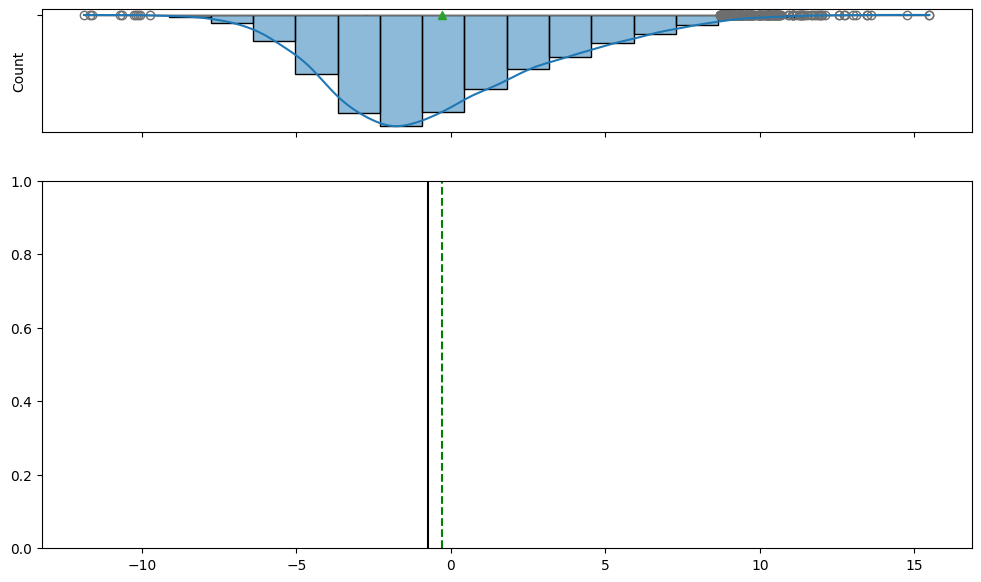

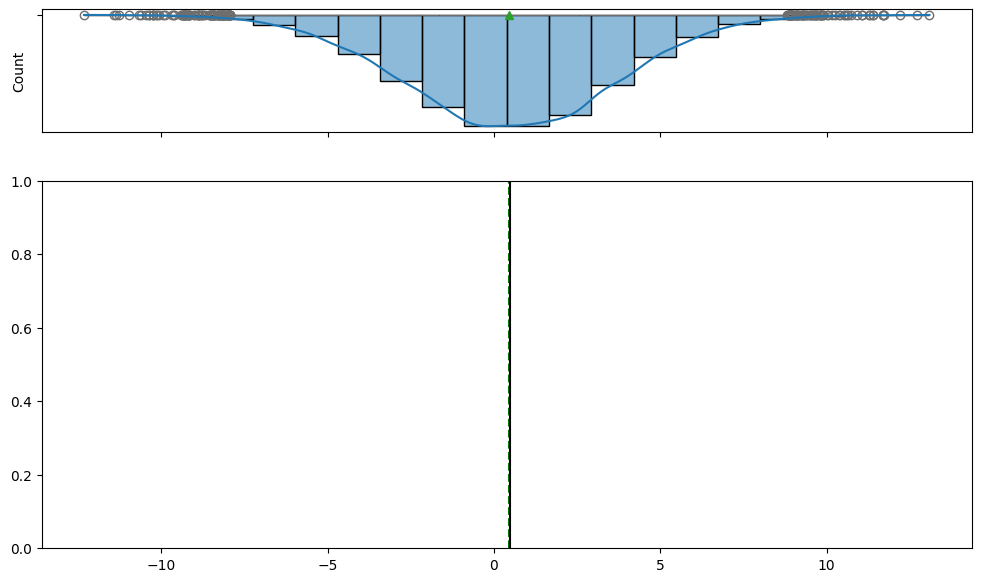

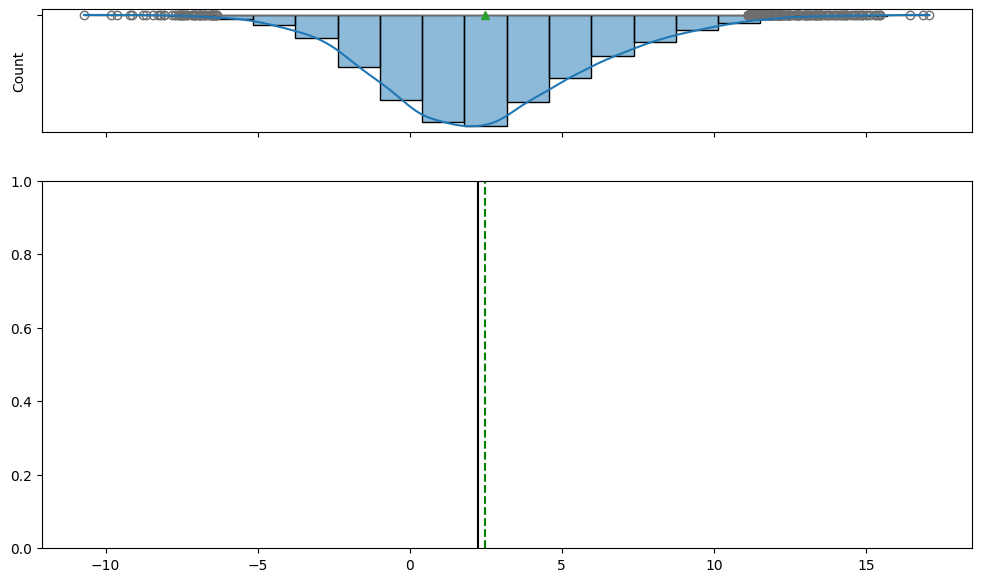

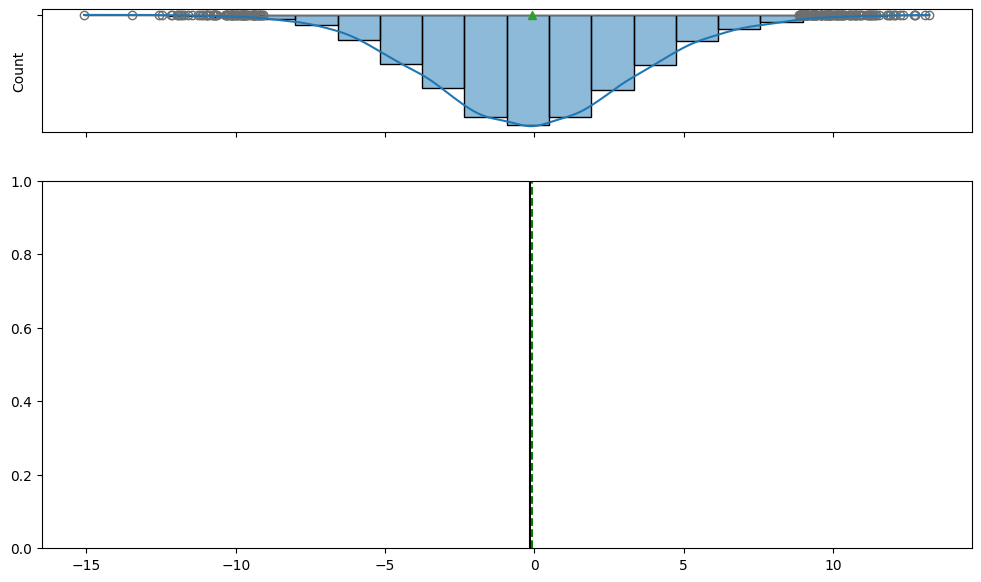

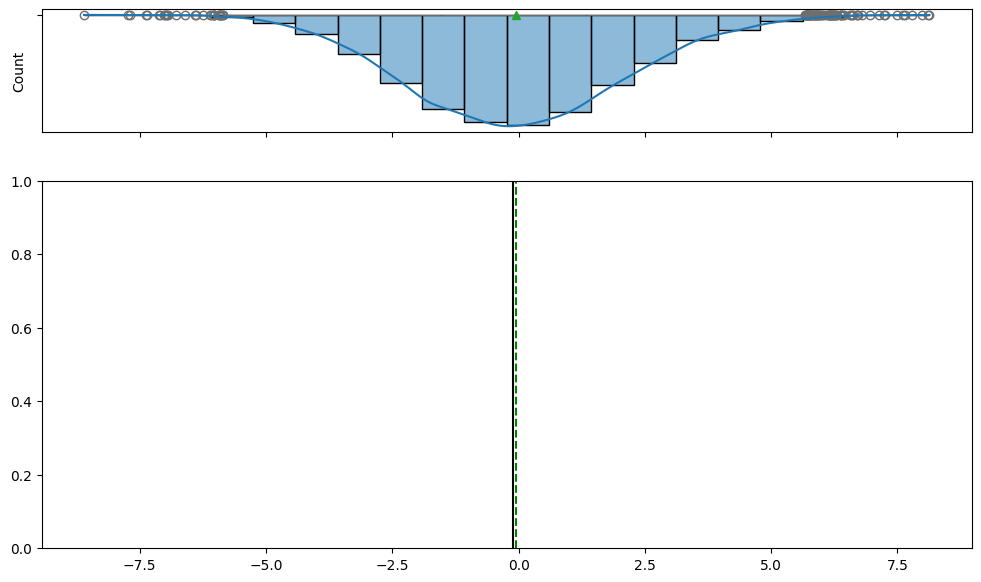

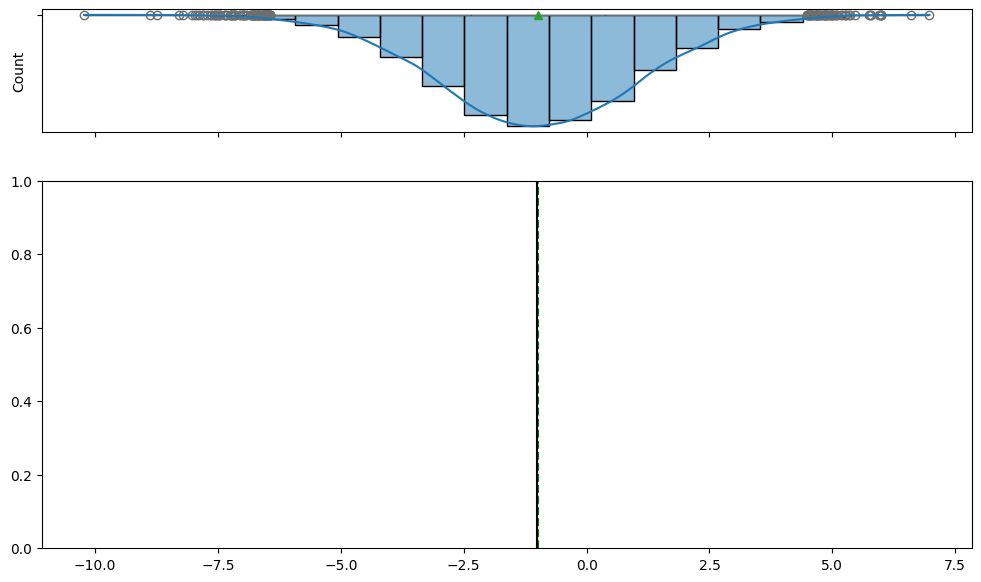

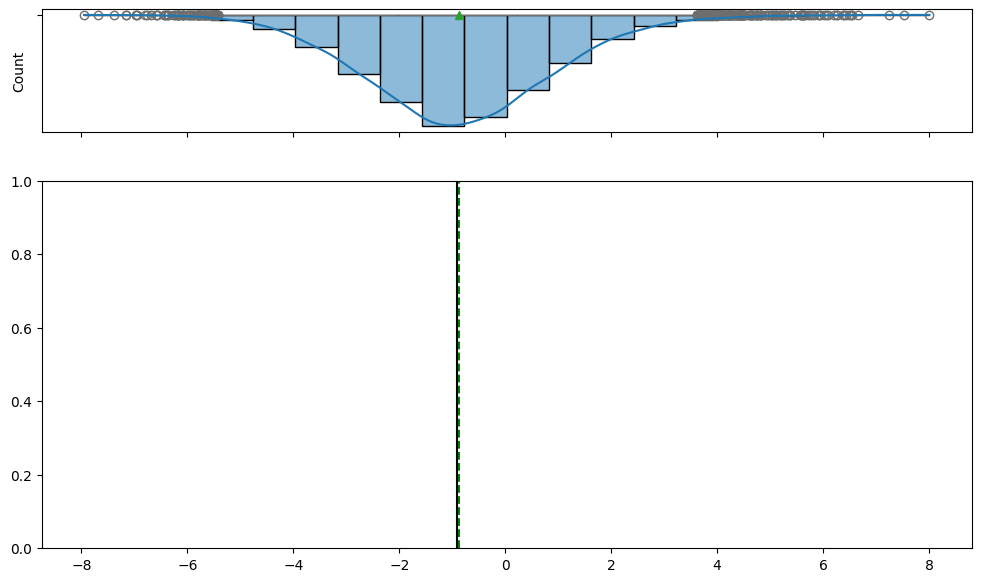

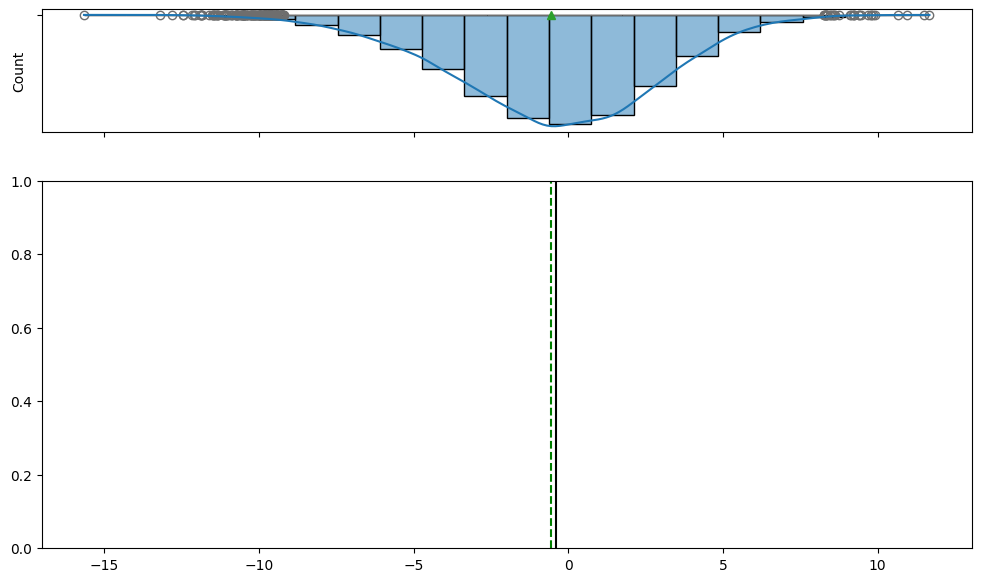

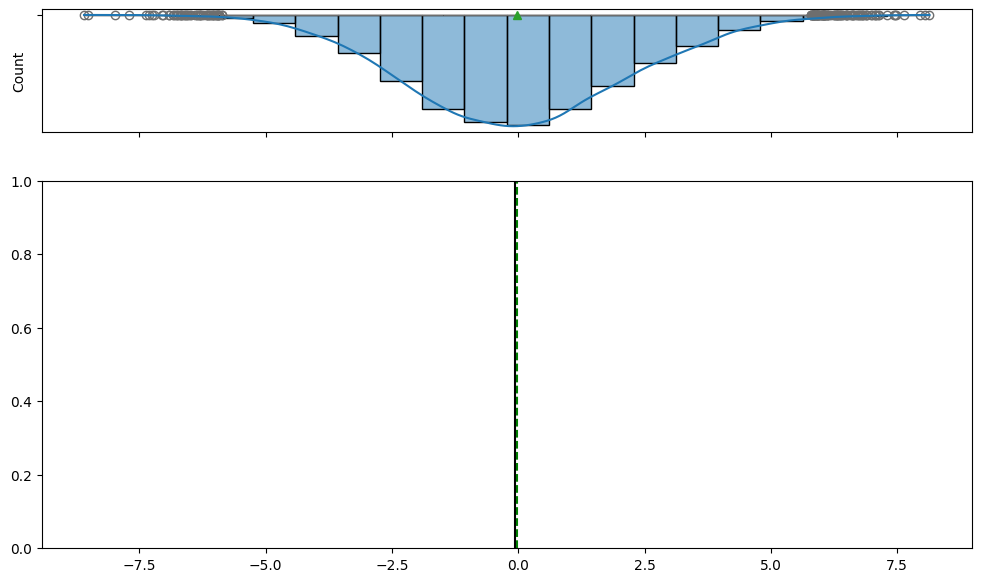

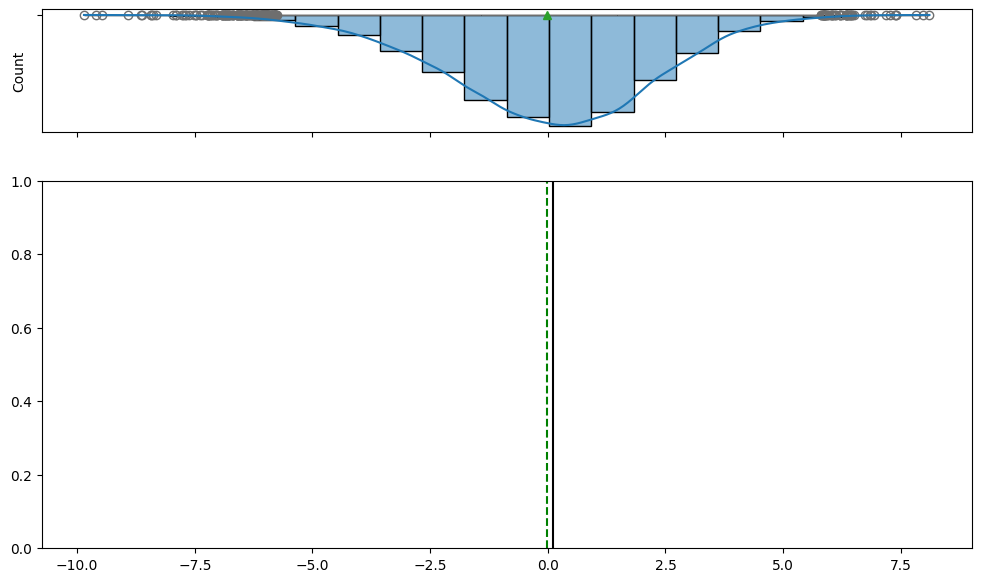

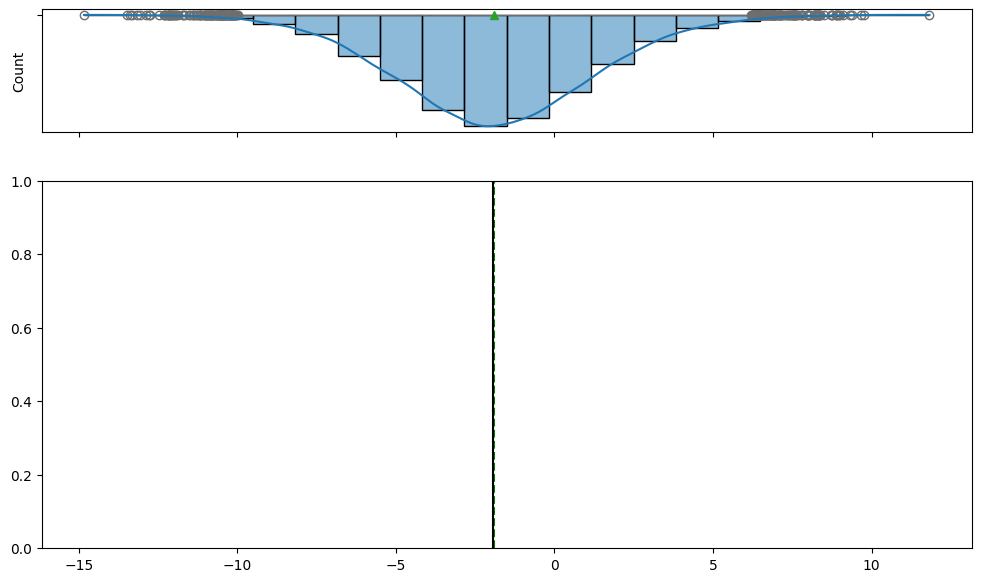

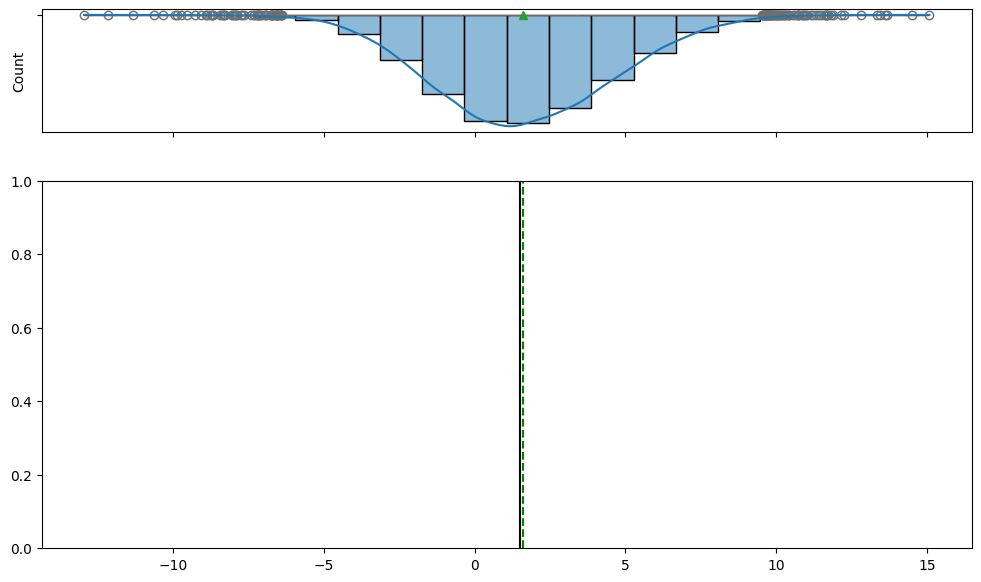

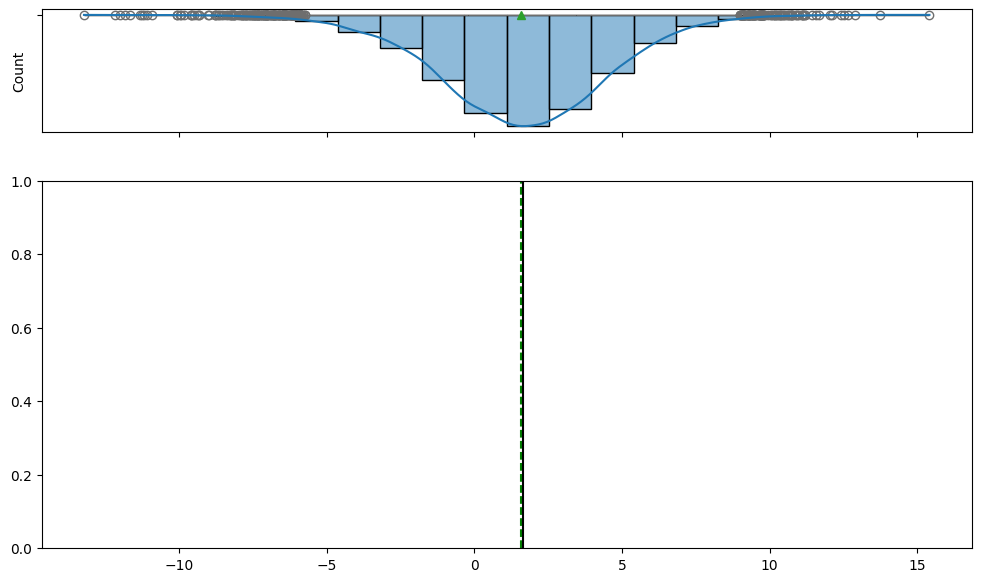

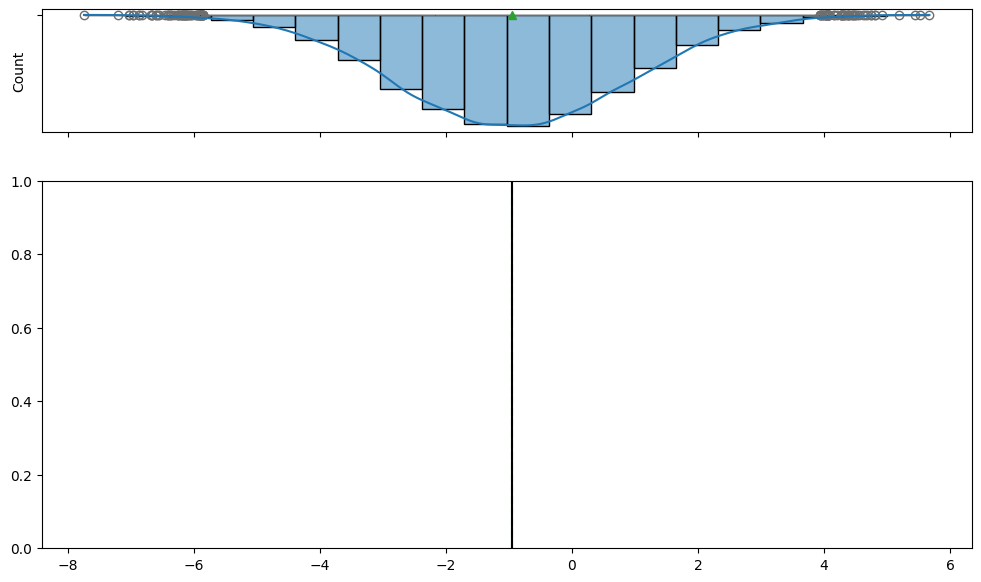

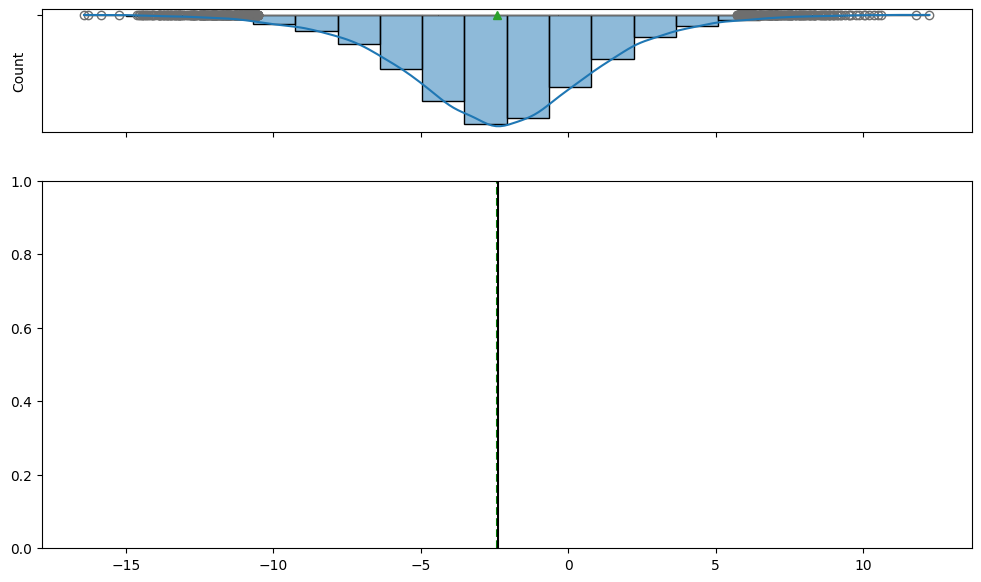

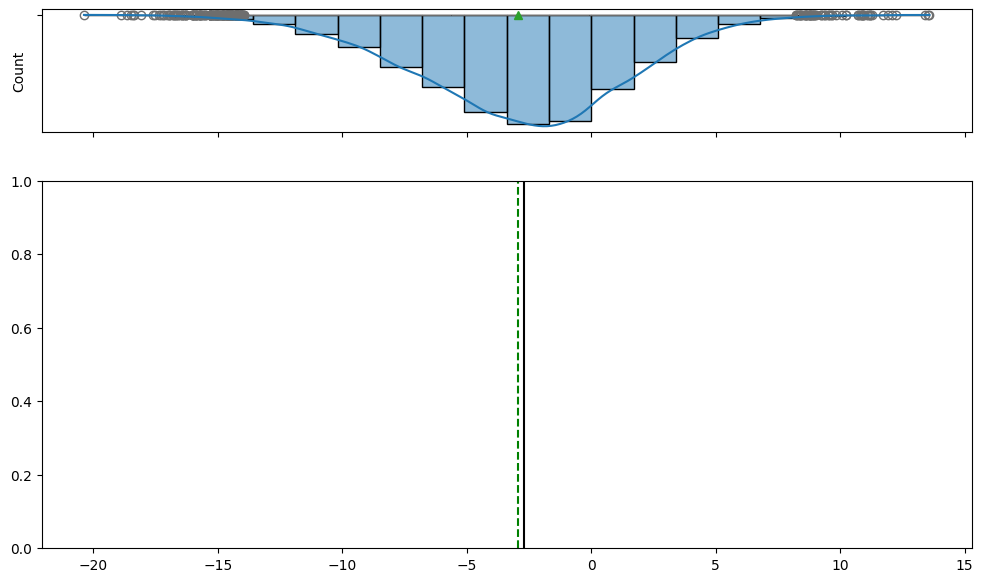

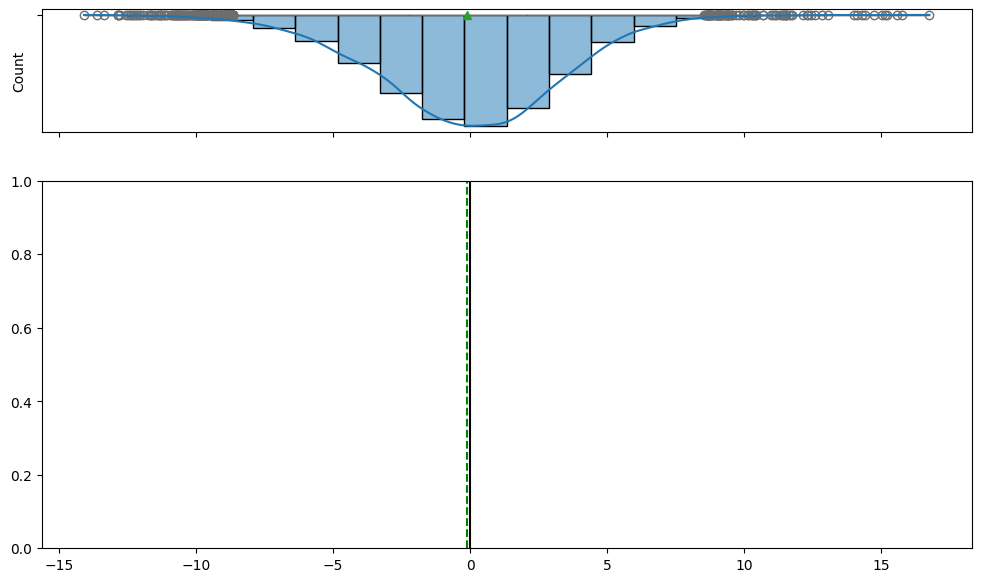

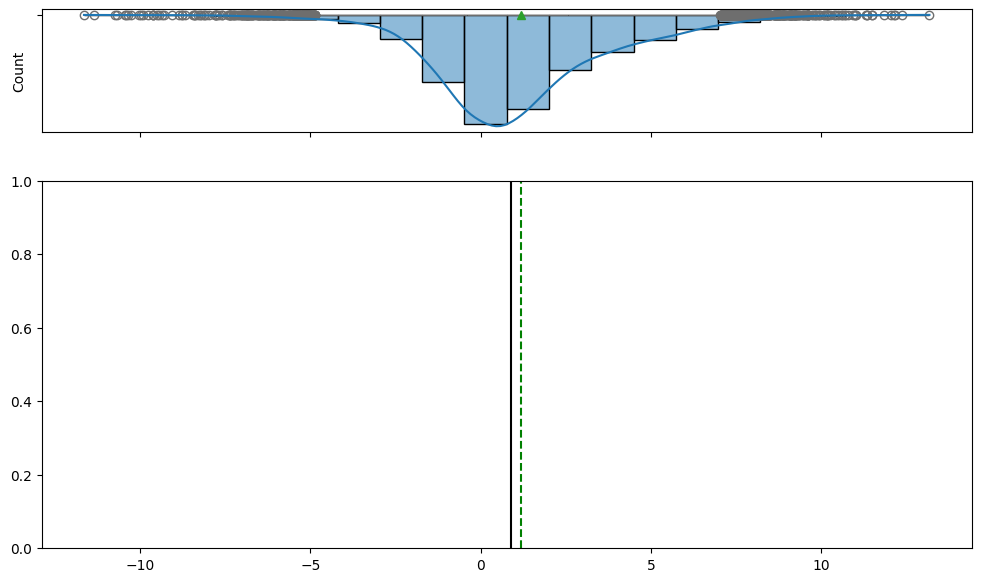

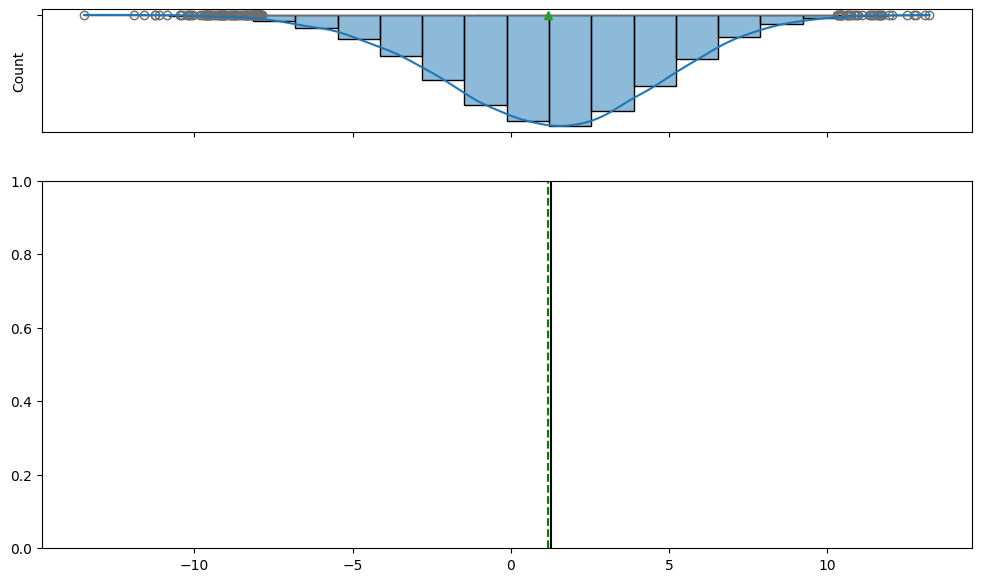

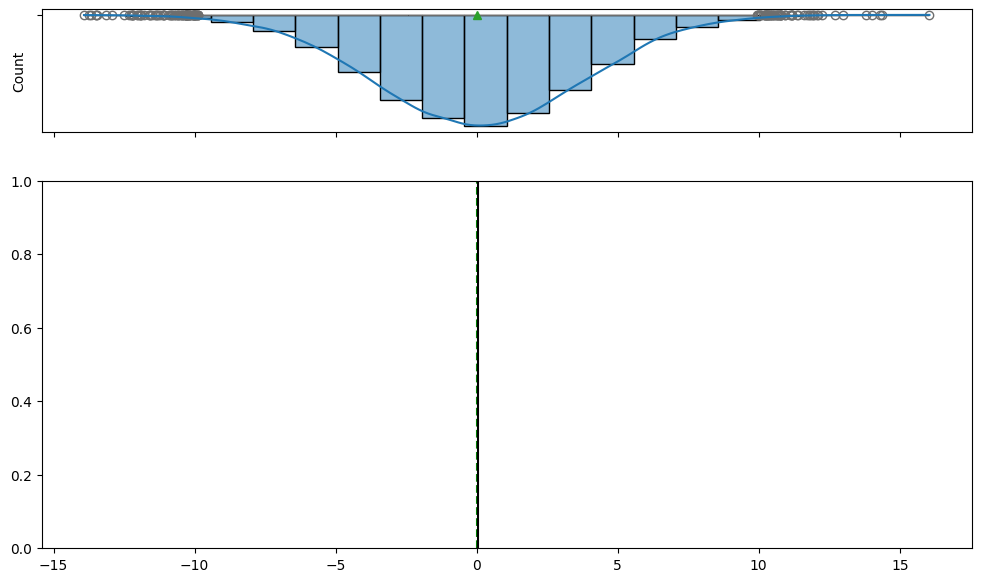

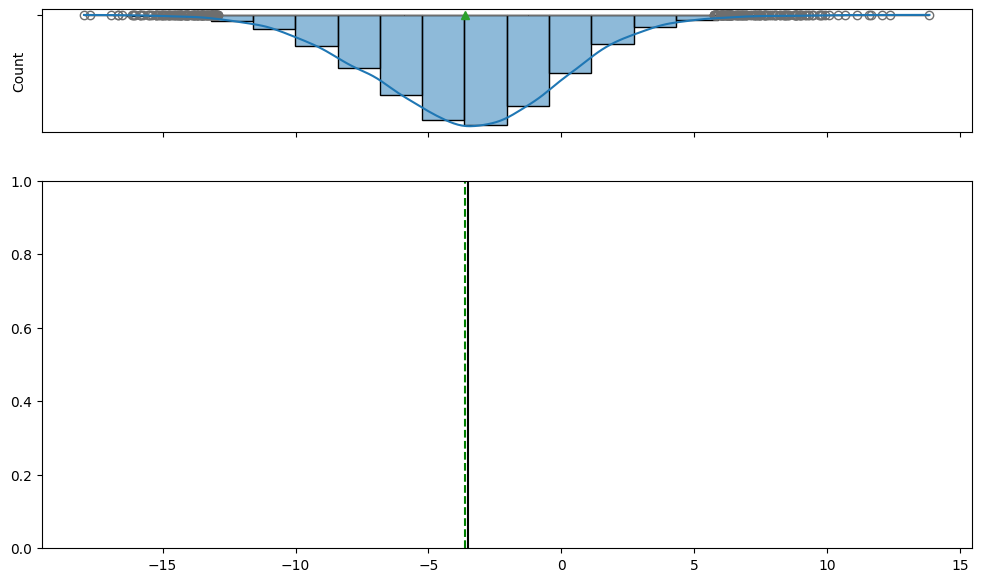

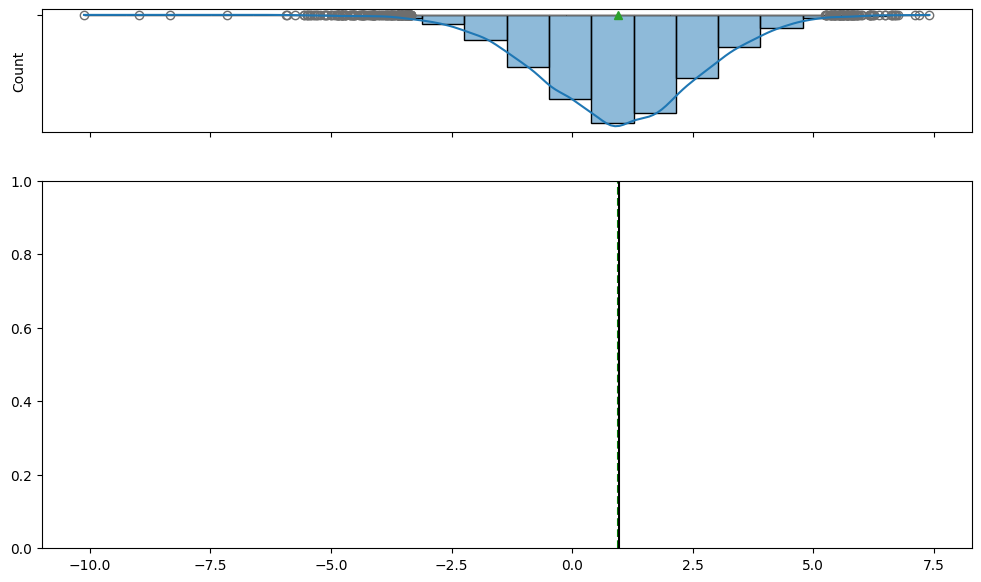

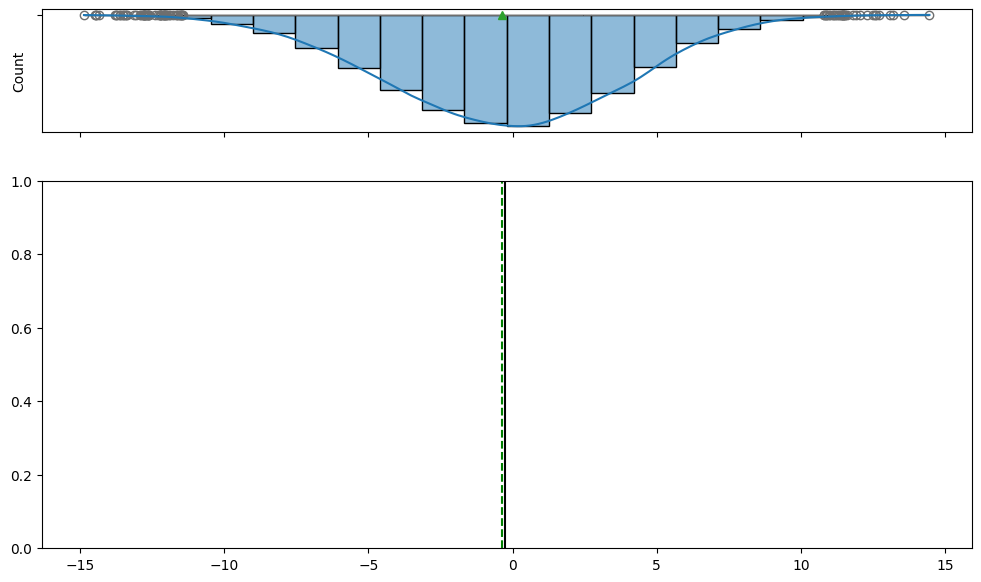

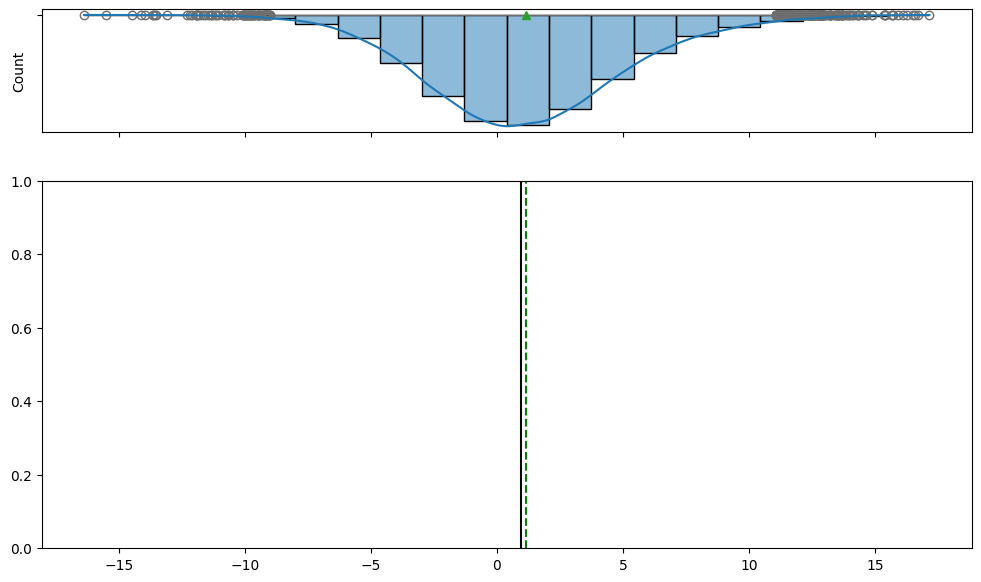

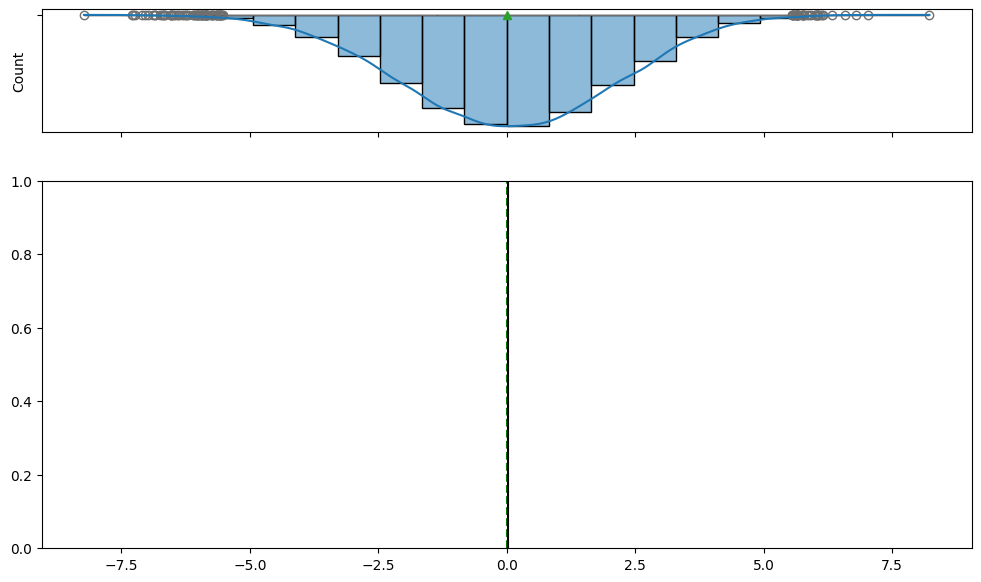

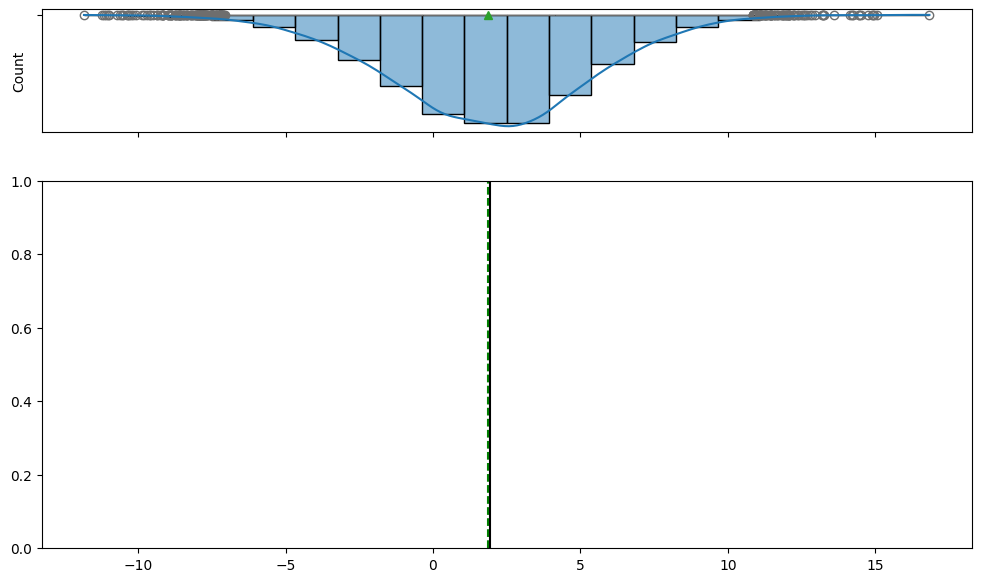

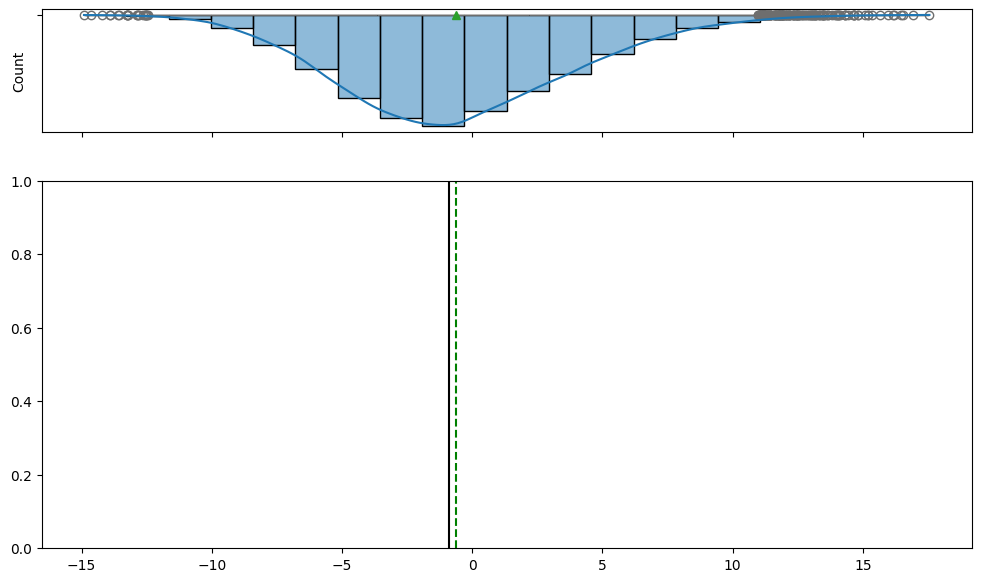

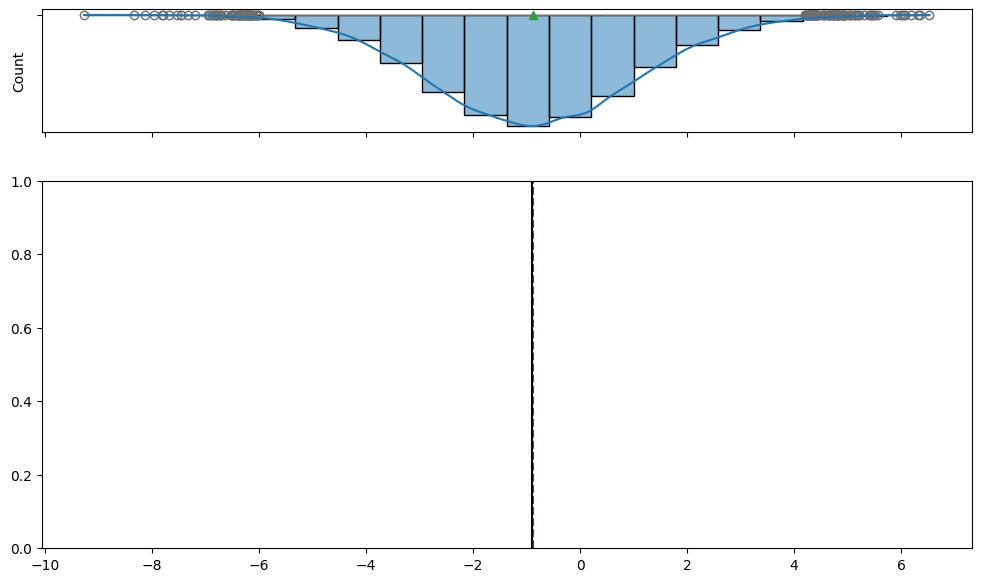

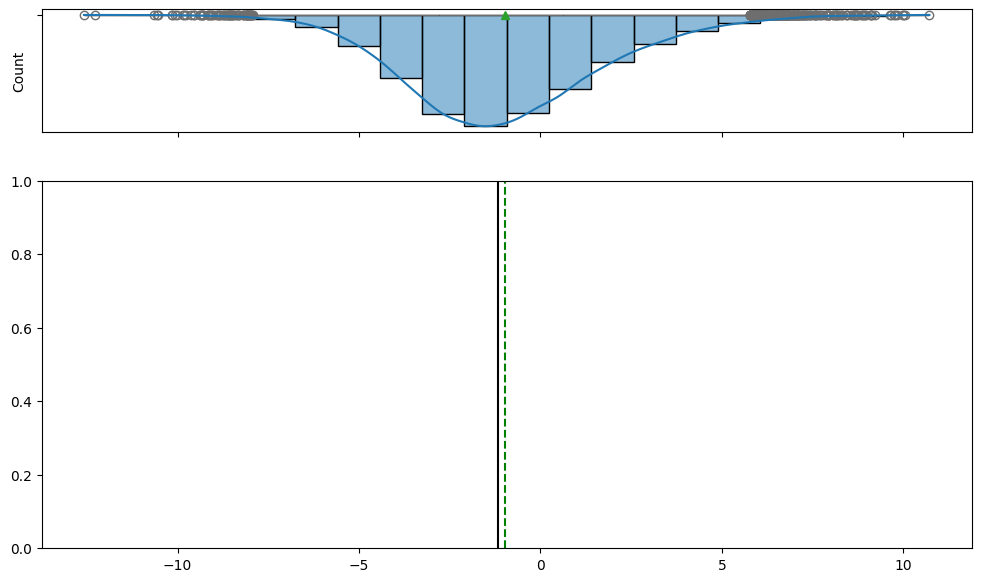

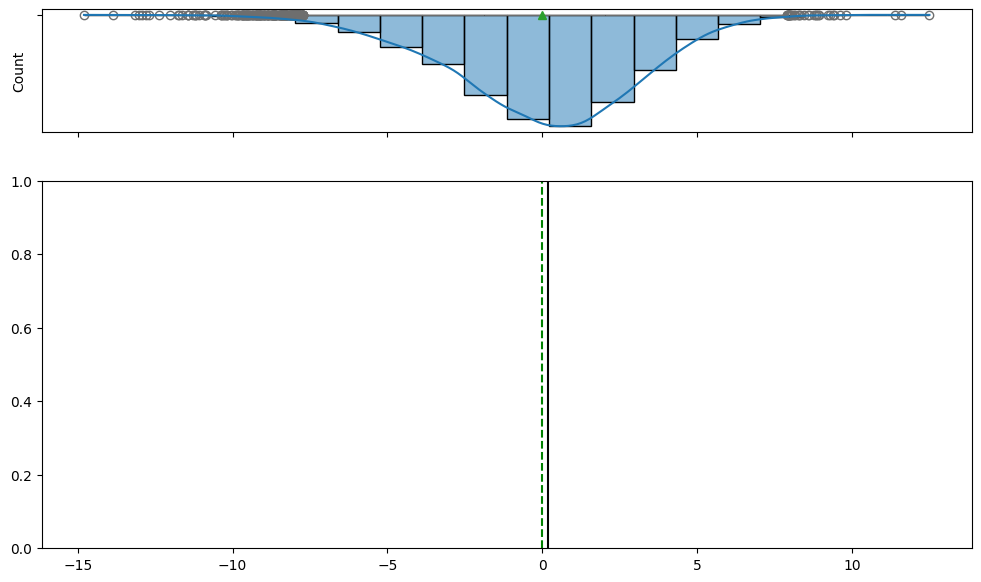

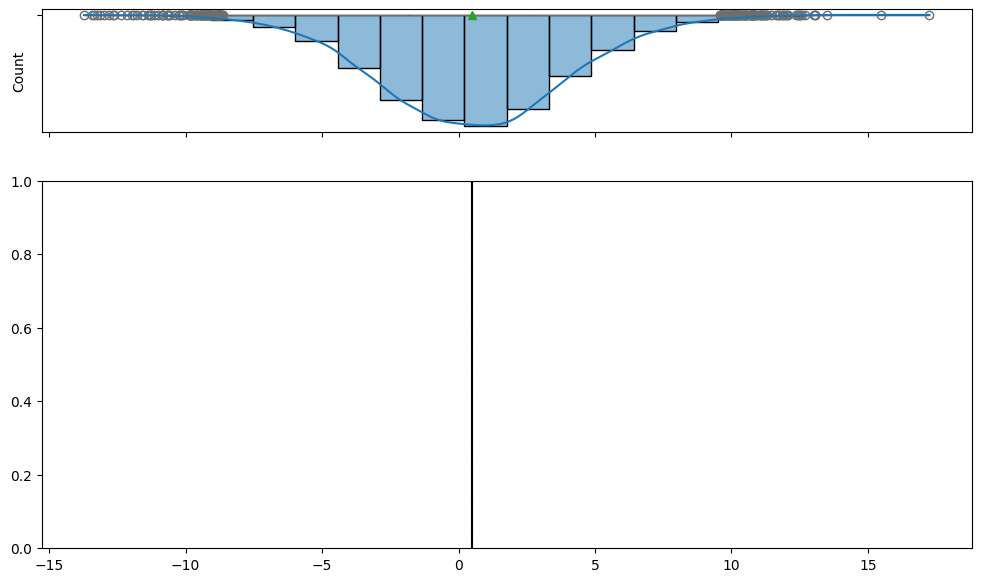

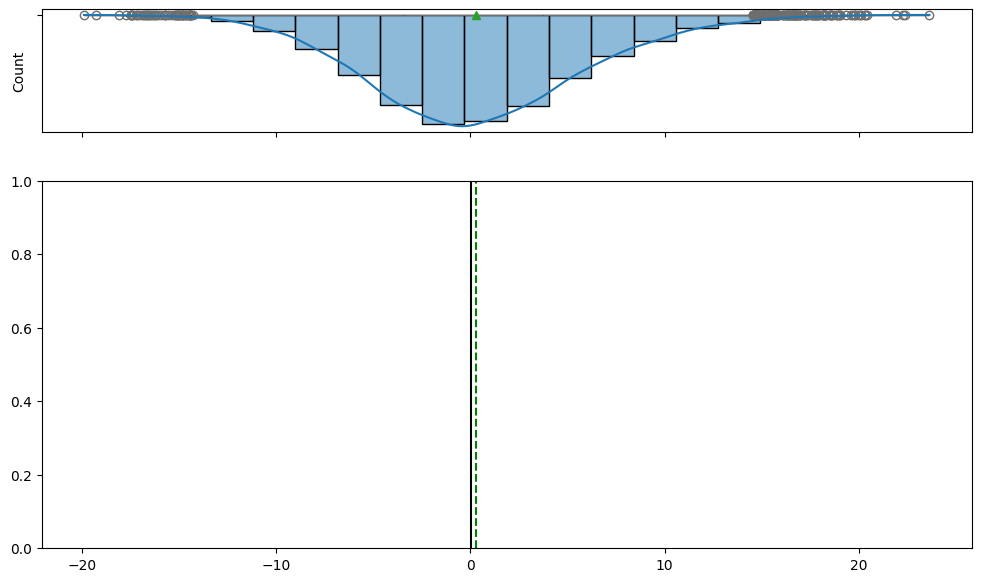

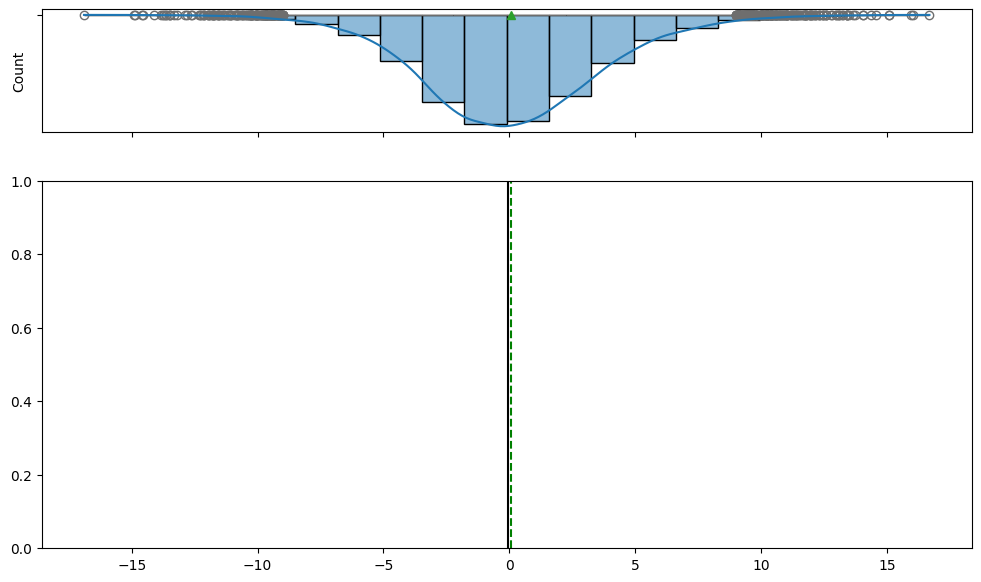

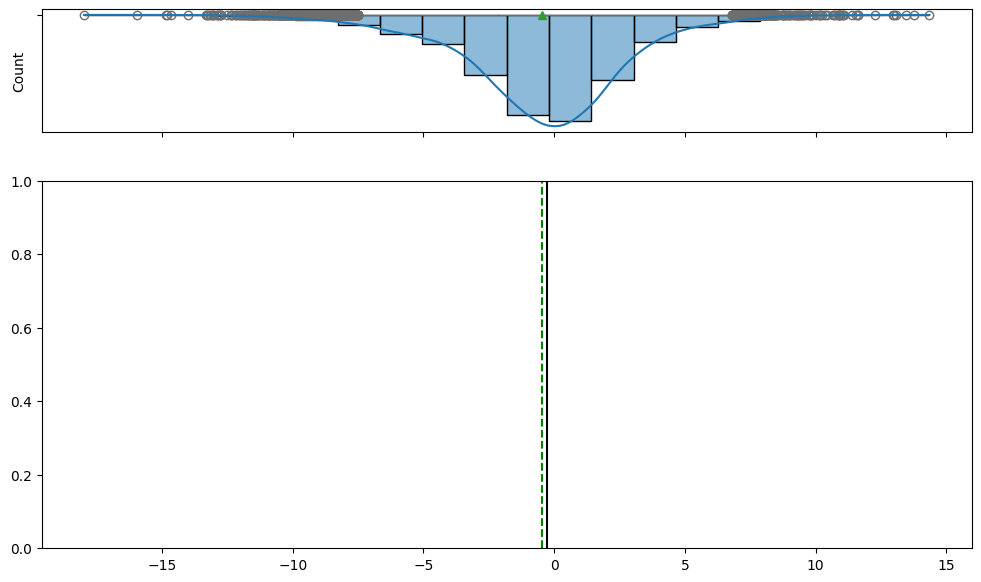

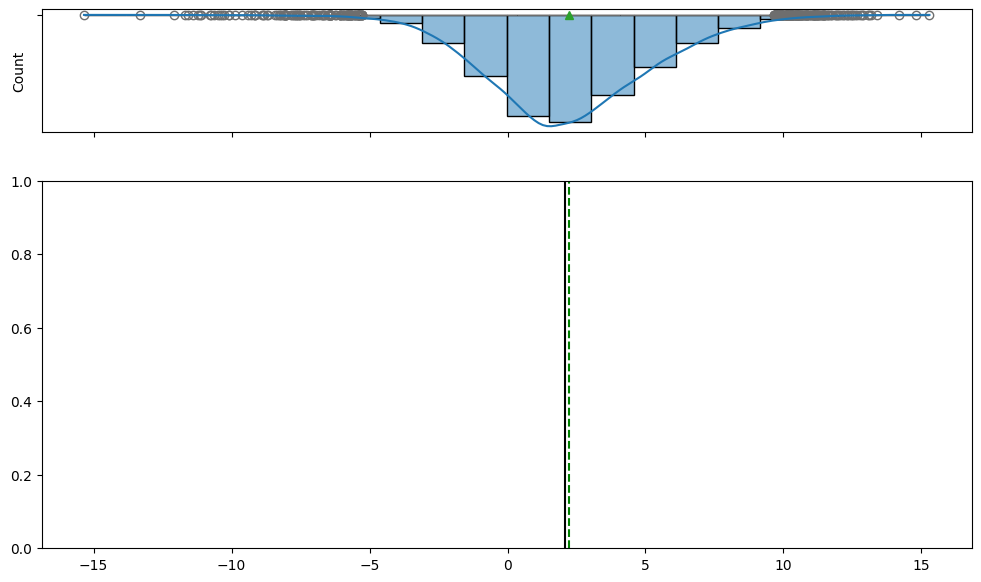

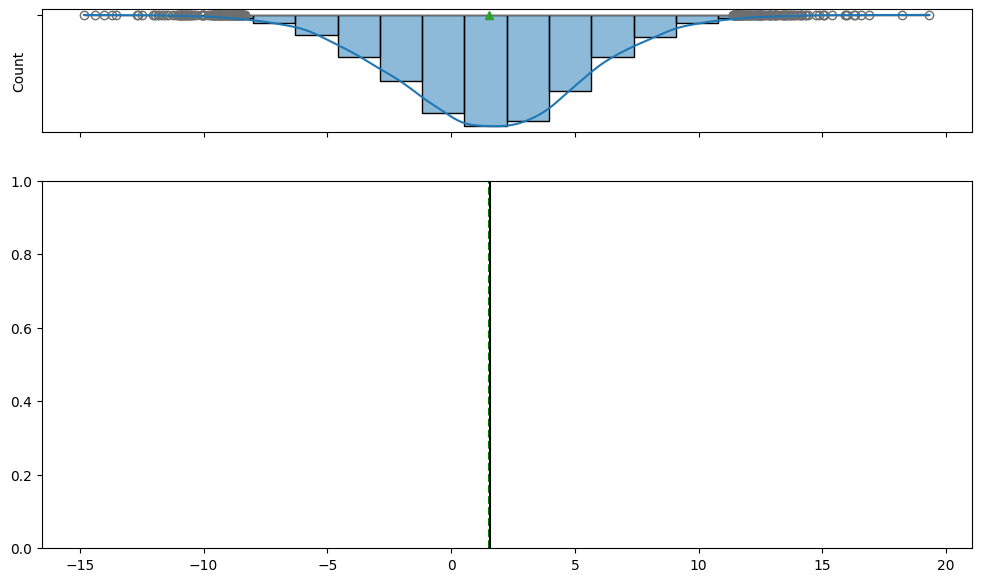

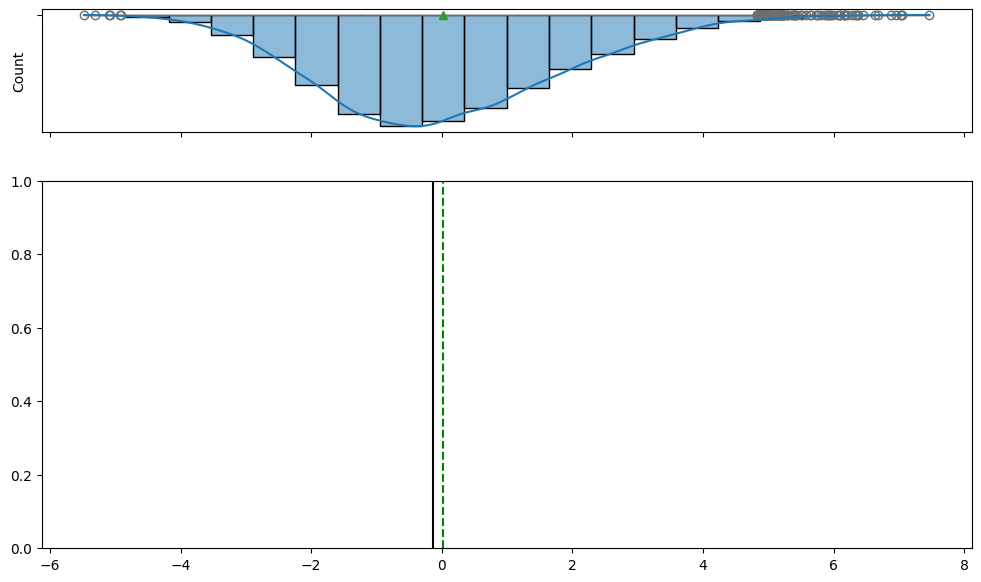

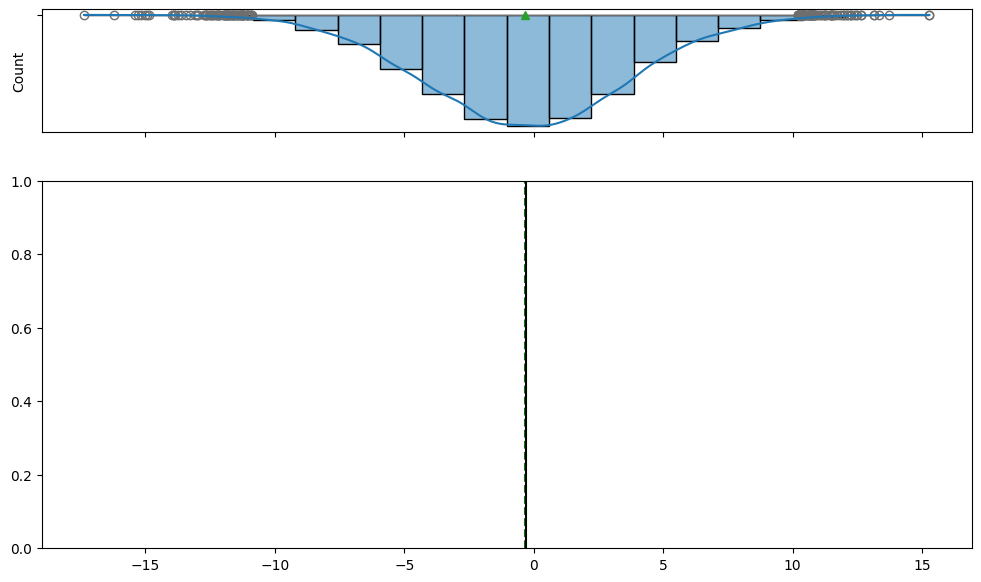

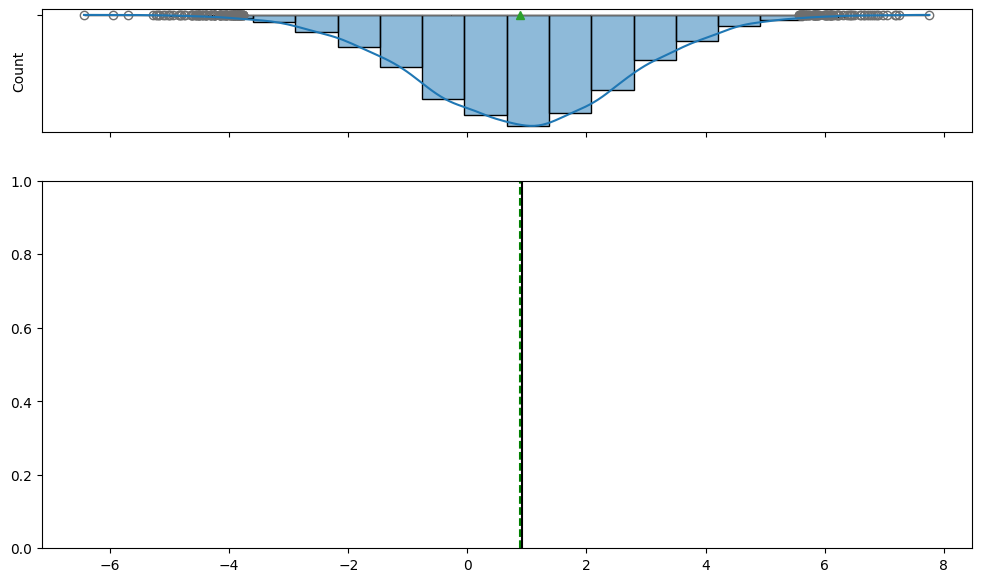

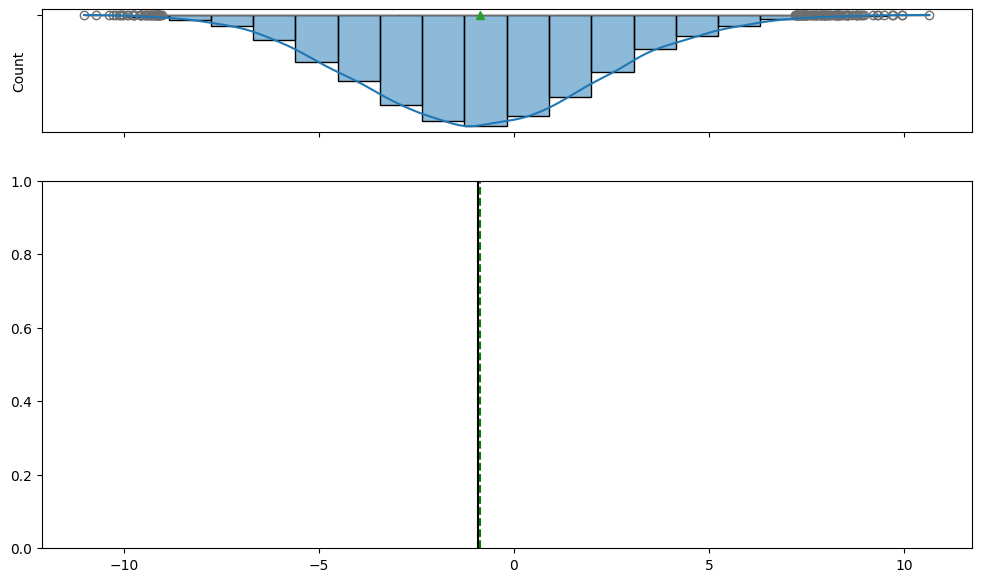

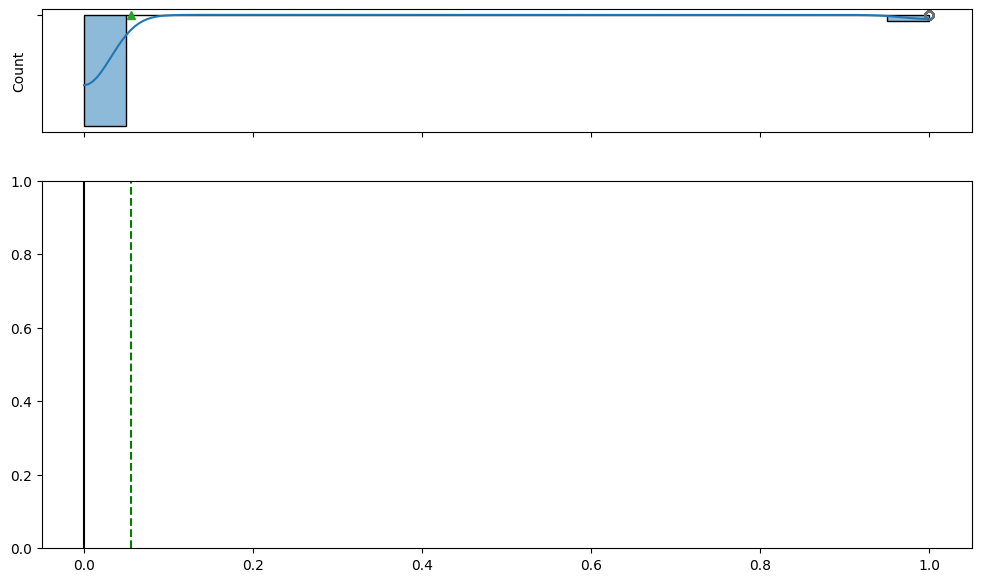

In [330]:
for feature in data.columns:
    histogram_boxplot(data, feature, bins=20, kde=True)

- All the features seems to have been **normalized**.
- This is a highly **imbalanced dataset** — we will need techniques like class weighting, oversampling


## Bivariate Analysis

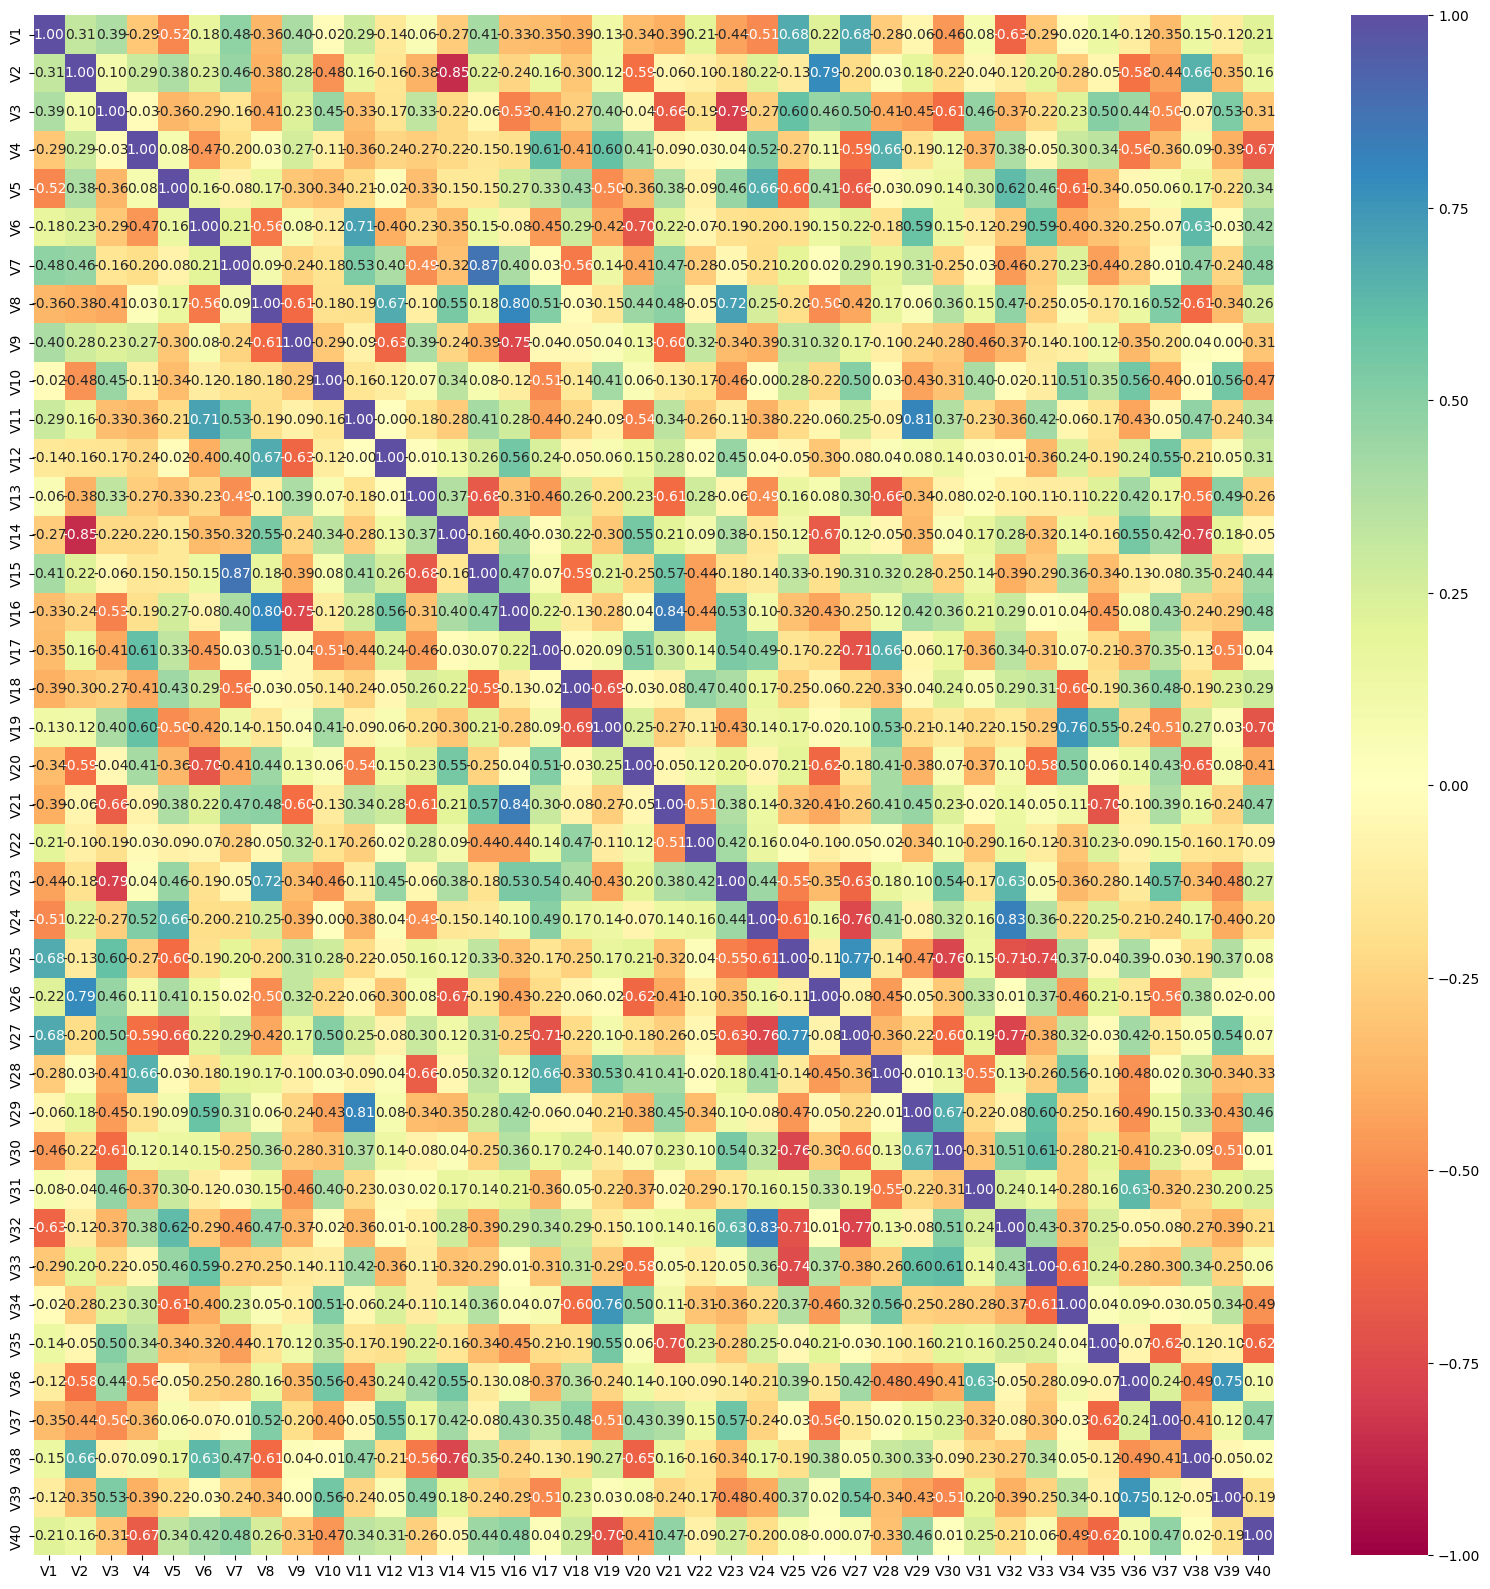

In [331]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()
cols_list.remove("Target")

plt.figure(figsize=(20, 20))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

# **Data Preprocessing**

In [485]:
X = data.drop(['Target'], axis=1)
y = data['Target']

In [486]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)



In [487]:
X_train.shape, X_val.shape

((14000, 40), (6000, 40))

In [488]:
X_test = data_test.drop(['Target'], axis=1)
y_test = data_test['Target']

In [489]:
X_test.shape, y_test.shape

((5000, 40), (5000,))

In [490]:
imputer = SimpleImputer(strategy='median')
X_train = imputer.fit_transform(X_train)
X_val = imputer.transform(X_val)
X_test = imputer.transform(X_test)

In [491]:
pd.isnull(X_train).sum(), pd.isnull(X_val).sum(), pd.isnull(X_test).sum()

(np.int64(0), np.int64(0), np.int64(0))

In [492]:
y_test.value_counts()

,count
Target,
0,4718
1,282


In [493]:
y_train.value_counts()

,count
Target,
0,13223
1,777


# **Model Building**

In [341]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [342]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='macro')  # to compute Recall
    precision = precision_score(target, pred, average='macro')  # to compute Precision
    f1 = f1_score(target, pred, average='macro')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,}, index = [0]
    )

    return df_perf

## Model Evaluation Criterion

Write down the model evaluation criterion with rationale

Objective - It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.


Based on the objective, the Recall seems to be the preferrred metrics . **As cost of inspection is the least** , False positives are tolerated.

## Initial Model Building (Model 0)

- Let's start with a neural network consisting of
  - just one hidden layer
  - activation function of ReLU
  - SGD as the optimizer

In [343]:
epochs= 40
batch_size= 32

In [344]:
early_stopping = EarlyStopping(
    monitor='val_recall',  # Stop when validation recall stops improving
    patience=3,           # Wait 5 epochs w/o improvement
    mode='max'            # Maximize recall
)

In [345]:
tf.keras.backend.clear_session()

In [346]:
model_0 = Sequential()
model_0.add(Dense( 64 ,activation="relu",input_dim=X_train.shape[1]))
model_0.add(Dense( 1 ,activation="sigmoid"))

In [197]:
model_0.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │         2,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

In [347]:
optimizer = tf.keras.optimizers.SGD()
model_0.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])

In [348]:
start = time.time()
history = model_0.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs, callbacks=[early_stopping])
end=time.time()

Epoch 1/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.4628 - loss: 0.1822 - val_Recall: 0.6096 - val_loss: 0.0998
Epoch 2/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Recall: 0.6059 - loss: 0.0902 - val_Recall: 0.7267 - val_loss: 0.0879
Epoch 3/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.6913 - loss: 0.0817 - val_Recall: 0.7628 - val_loss: 0.0832
Epoch 4/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - Recall: 0.7456 - loss: 0.0658 - val_Recall: 0.7688 - val_loss: 0.0790
Epoch 5/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7551 - loss: 0.0672 - val_Recall: 0.7778 - val_loss: 0.0763
Epoch 6/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7805 - loss: 0.0652 - val_Recall: 0.7988 - val_loss: 0.0745
Epoch 7/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.8130 - loss: 0.0567 - val_Recall: 0.7868 - val_loss: 0.0722
Epoch 8/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - Recall: 0.7857 - loss: 0.0601 - val_Recall: 0.8018 - val_loss: 0.0702
Epoch 9/

In [349]:
model_0_train_perf = model_performance_classification(model_0, X_train, y_train)
model_0_train_perf

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9915,0.931297,0.986517,0.957032


In [358]:
model_0_val_perf = model_performance_classification(model_0,X_val,y_val)
model_0_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.990333,0.924219,0.981875,0.950976


In [351]:
y_train_pred_0 = model_0.predict(X_train)
y_val_pred_0 = model_0.predict(X_val)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [352]:
print("Classification Report - Train data Model_0",end="\n\n")
cr_train_model_0 = classification_report(y_train,y_train_pred_0>0.5)
print(cr_train_model_0)

Classification Report - Train data Model_0

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13223
           1       0.98      0.86      0.92       777

    accuracy                           0.99     14000
   macro avg       0.99      0.93      0.96     14000
weighted avg       0.99      0.99      0.99     14000



In [353]:
print("Classification Report - Validation data Model_0",end="\n\n")
cr_val_model_0 = classification_report(y_val,y_val_pred_0>0.5)
print(cr_val_model_0)

Classification Report - Validation data Model_0

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5667
           1       0.97      0.85      0.91       333

    accuracy                           0.99      6000
   macro avg       0.98      0.92      0.95      6000
weighted avg       0.99      0.99      0.99      6000



# **Model Performance Improvement**

## Model 1

In [359]:
tf.keras.backend.clear_session()

In [360]:
model_1 = Sequential()
model_1.add(Dense( 64 ,activation="relu",input_dim=X_train.shape[1]))
model_1.add(Dense( 32 ,activation="relu",input_dim=X_train.shape[1]))
model_1.add(Dense( 1 ,activation="sigmoid"))

In [361]:
optimizer = tf.keras.optimizers.SGD()
model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])

In [362]:
start = time.time()
history = model_1.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs, callbacks=[early_stopping])
end=time.time()

Epoch 1/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.1544 - loss: 0.2071 - val_Recall: 0.4985 - val_loss: 0.1148
Epoch 2/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.5017 - loss: 0.1041 - val_Recall: 0.6607 - val_loss: 0.0917
Epoch 3/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7032 - loss: 0.0743 - val_Recall: 0.7117 - val_loss: 0.0819
Epoch 4/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7354 - loss: 0.0684 - val_Recall: 0.7357 - val_loss: 0.0777
Epoch 5/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7718 - loss: 0.0668 - val_Recall: 0.7598 - val_loss: 0.0744
Epoch 6/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7944 - loss: 0.0612 - val_Recall: 0.7628 - val_loss: 0.0715
Epoch 7/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Recall: 0.8035 - loss: 0.0574 - val_Recall: 0.7838 - val_loss: 0.0692
Epoch 8/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Recall: 0.8194 - loss: 0.0548 - val_Recall: 0.7958 - val_loss: 0.0687
Epoch 9/

In [363]:
model_1_train_perf = model_performance_classification(model_1, X_train, y_train)
model_1_train_perf

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.993357,0.945,0.99109,0.966764


In [368]:
model_1_val_perf = model_performance_classification(model_1,X_val,y_val)
model_1_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9895,0.918125,0.979648,0.946507


In [365]:
y_train_pred_1 = model_1.predict(X_train)
y_val_pred_1 = model_1.predict(X_val)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [389]:
print("Classification Report - Train data Model_1",end="\n\n")
cr_train_model_1 = classification_report(y_train,y_train_pred_0>0.5)
print(cr_train_model_1)

Classification Report - Train data Model_1

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13223
           1       0.98      0.86      0.92       777

    accuracy                           0.99     14000
   macro avg       0.99      0.93      0.96     14000
weighted avg       0.99      0.99      0.99     14000



In [390]:
print("Classification Report - Validation data Model_1",end="\n\n")
cr_val_model_1 = classification_report(y_val,y_val_pred_0>0.5)
print(cr_val_model_1)

Classification Report - Validation data Model_1

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5667
           1       0.97      0.85      0.91       333

    accuracy                           0.99      6000
   macro avg       0.98      0.92      0.95      6000
weighted avg       0.99      0.99      0.99      6000



## Model 2

In [370]:
tf.keras.backend.clear_session()

In [371]:
model_2 = Sequential()
model_2.add(Dense( 64 ,activation="relu",input_dim=X_train.shape[1]))
model_2.add(Dense( 32 ,activation="relu",input_dim=X_train.shape[1]))
model_2.add(Dense( 1 ,activation="sigmoid"))

In [372]:
optimizer = tf.keras.optimizers.Adam()
model_2.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])

In [373]:
start = time.time()
history = model_2.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs, callbacks=[early_stopping])
end=time.time()

Epoch 1/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - Recall: 0.4232 - loss: 0.1673 - val_Recall: 0.8048 - val_loss: 0.0674
Epoch 2/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7872 - loss: 0.0628 - val_Recall: 0.8078 - val_loss: 0.0629
Epoch 3/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.8342 - loss: 0.0529 - val_Recall: 0.8529 - val_loss: 0.0595
Epoch 4/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Recall: 0.8843 - loss: 0.0428 - val_Recall: 0.8589 - val_loss: 0.0560
Epoch 5/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8928 - loss: 0.0375 - val_Recall: 0.8559 - val_loss: 0.0552
Epoch 6/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8842 - loss: 0.0373 - val_Recall: 0.8438 - val_loss: 0.0556
Epoch 7/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8870 - loss: 0.0348 - val_Recall: 0.8619 - val_loss: 0.0571
Epoch 8/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.8958 - loss: 0.0289 - val_Recall: 0.8529 - val_loss: 0.0572
Epoch 9/

In [374]:
model_2_train_perf = model_performance_classification(model_2, X_train, y_train)
model_2_train_perf

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.996143,0.970096,0.992853,0.98117


In [375]:
model_2_val_perf = model_performance_classification(model_2,X_val,y_val)
model_2_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.989833,0.929607,0.971129,0.949285


In [376]:
y_train_pred_2 = model_2.predict(X_train)
y_val_pred_2 = model_2.predict(X_val)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [377]:
print("Classification Report - Train data Model_2",end="\n\n")
cr_train_model_2 = classification_report(y_train,y_train_pred_0>0.5)
print(cr_train_model_2)

Classification Report - Train data Model_2

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13223
           1       0.98      0.86      0.92       777

    accuracy                           0.99     14000
   macro avg       0.99      0.93      0.96     14000
weighted avg       0.99      0.99      0.99     14000



In [378]:
print("Classification Report - Validation data Model_2",end="\n\n")
cr_val_model_2 = classification_report(y_val,y_val_pred_0>0.5)
print(cr_val_model_2)

Classification Report - Validation data Model_2

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5667
           1       0.97      0.85      0.91       333

    accuracy                           0.99      6000
   macro avg       0.98      0.92      0.95      6000
weighted avg       0.99      0.99      0.99      6000



## Model 3

In [379]:
tf.keras.backend.clear_session()

In [380]:
model_3 = Sequential()
model_3.add(Dense( 64 ,activation="relu",input_dim=X_train.shape[1]))
model_3.add(Dense( 32 ,activation="relu",input_dim=X_train.shape[1]))
model_3.add(Dense( 1 ,activation="sigmoid"))

In [381]:
initial_learning_rate = 0.001
total_steps = 40 * (20_000 // 35)

lr_schedule = CosineDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=total_steps
)

In [382]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model_3.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])

In [383]:
start = time.time()
history = model_3.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs, callbacks=[early_stopping])
end=time.time()

Epoch 1/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.4264 - loss: 0.2984 - val_Recall: 0.8198 - val_loss: 0.0752
Epoch 2/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Recall: 0.7995 - loss: 0.0587 - val_Recall: 0.8378 - val_loss: 0.0619
Epoch 3/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Recall: 0.8600 - loss: 0.0451 - val_Recall: 0.8318 - val_loss: 0.0564
Epoch 4/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.8552 - loss: 0.0466 - val_Recall: 0.8408 - val_loss: 0.0583
Epoch 5/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8820 - loss: 0.0438 - val_Recall: 0.8228 - val_loss: 0.0612
Epoch 6/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8912 - loss: 0.0332 - val_Recall: 0.8619 - val_loss: 0.0521
Epoch 7/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.9018 - loss: 0.0345 - val_Recall: 0.8649 - val_loss: 0.0509
Epoch 8/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8968 - loss: 0.0340 - val_Recall: 0.8679 - val_loss: 0.0540
Epoch 9/

In [384]:
model_3_train_perf = model_performance_classification(model_3, X_train, y_train)
model_3_train_perf

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.997071,0.973616,0.998454,0.985677


In [385]:
model_3_val_perf = model_performance_classification(model_3,X_val,y_val)
model_3_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.992333,0.939411,0.986458,0.961584


In [386]:
y_train_pred_3 = model_3.predict(X_train)
y_val_pred_3 = model_3.predict(X_val)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [392]:
print("Classification Report - Train data Model_3",end="\n\n")
cr_train_model_3 = classification_report(y_train,y_train_pred_0>0.5)
print(cr_train_model_3)

Classification Report - Train data Model_3

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13223
           1       0.98      0.86      0.92       777

    accuracy                           0.99     14000
   macro avg       0.99      0.93      0.96     14000
weighted avg       0.99      0.99      0.99     14000



In [393]:
print("Classification Report - Validation data Model_3",end="\n\n")
cr_val_model_3 = classification_report(y_val,y_val_pred_0>0.5)
print(cr_val_model_3)

Classification Report - Validation data Model_3

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5667
           1       0.97      0.85      0.91       333

    accuracy                           0.99      6000
   macro avg       0.98      0.92      0.95      6000
weighted avg       0.99      0.99      0.99      6000



## Model 4

In [394]:
tf.keras.backend.clear_session()

In [395]:
model_4 = Sequential()
model_4.add(Dense( 64 ,activation="relu",input_dim=X_train.shape[1]))
model_4.add(Dropout(0.3))
model_4.add(Dense( 32 ,activation="relu",input_dim=X_train.shape[1]))
model_4.add(Dropout(0.3))
model_4.add(Dense( 1 ,activation="sigmoid"))

In [396]:
initial_learning_rate = 0.001
total_steps = 40 * (20000 // 35)

lr_schedule = CosineDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=total_steps
)

In [397]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model_4.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'])

In [398]:
start = time.time()
history = model_4.fit(X_train, y_train, validation_data=(X_val,y_val) , batch_size=batch_size, epochs=epochs, callbacks=[early_stopping])
end=time.time()

Epoch 1/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.2696 - loss: 0.2429 - val_Recall: 0.6456 - val_loss: 0.0956
Epoch 2/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.6182 - loss: 0.1072 - val_Recall: 0.7538 - val_loss: 0.0744
Epoch 3/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Recall: 0.7360 - loss: 0.0805 - val_Recall: 0.7868 - val_loss: 0.0649
Epoch 4/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.7232 - loss: 0.0730 - val_Recall: 0.8168 - val_loss: 0.0617
Epoch 5/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - Recall: 0.7598 - loss: 0.0628 - val_Recall: 0.8438 - val_loss: 0.0599
Epoch 6/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Recall: 0.7964 - loss: 0.0612 - val_Recall: 0.8468 - val_loss: 0.0592
Epoch 7/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.7896 - loss: 0.0590 - val_Recall: 0.8438 - val_loss: 0.0589
Epoch 8/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.8373 - loss: 0.0549 - val_Recall: 0.8529 - val_loss: 0.0557
Epoch 9/

In [401]:
model_4_train_perf = model_performance_classification(model_4, X_train, y_train)
model_4_train_perf

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.994071,0.949618,0.993516,0.970413


In [402]:
model_4_val_perf = model_performance_classification(model_4,X_val,y_val)
model_4_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9925,0.940912,0.986579,0.962476


In [403]:
y_train_pred_4 = model_4.predict(X_train)
y_val_pred_4 = model_4.predict(X_val)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [407]:
print("Classification Report - Train data Model_4",end="\n\n")
cr_train_model_4 = classification_report(y_train,y_train_pred_0>0.5)
print(cr_train_model_4)

Classification Report - Train data Model_4

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13223
           1       0.98      0.86      0.92       777

    accuracy                           0.99     14000
   macro avg       0.99      0.93      0.96     14000
weighted avg       0.99      0.99      0.99     14000



In [408]:
print("Classification Report - Validation data Model_4",end="\n\n")
cr_val_model_4 = classification_report(y_val,y_val_pred_0>0.5)
print(cr_val_model_4)

Classification Report - Validation data Model_4

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5667
           1       0.97      0.85      0.91       333

    accuracy                           0.99      6000
   macro avg       0.98      0.92      0.95      6000
weighted avg       0.99      0.99      0.99      6000



## Model 5

In [409]:
tf.keras.backend.clear_session()

In [410]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)  # Get unique classes as NumPy array
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight = {0: class_weights[0], 1: class_weights[1]}

print("Class weights:", class_weight)

Class weights: {0: np.float64(0.5293806246691372), 1: np.float64(9.00900900900901)}


In [411]:
model_5 = Sequential()
model_5.add(Dense( 64 ,activation="relu",input_dim=X_train.shape[1]))
model_5.add(Dropout(0.3))
model_5.add(Dense( 32 ,activation="relu",input_dim=X_train.shape[1]))
model_5.add(Dropout(0.3))
model_5.add(Dense( 1 ,activation="sigmoid"))

In [412]:
initial_learning_rate = 0.001
total_steps = 40 * (20_000 // 35)

lr_schedule = CosineDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=total_steps
)

In [413]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model_5.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'], weighted_metrics=['Recall'])

In [414]:
start = time.time()
history = model_5.fit(X_train, y_train, validation_data=(X_val,y_val) , class_weight=class_weight, batch_size=batch_size, epochs=epochs, callbacks=[early_stopping])
end=time.time()

Epoch 1/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - Recall: 0.6864 - loss: 0.6953 - weighted_Recall: 0.6864 - val_Recall: 0.8739 - val_loss: 0.2482 - val_weighted_Recall: 0.8739
Epoch 2/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Recall: 0.8563 - loss: 0.3823 - weighted_Recall: 0.8563 - val_Recall: 0.8739 - val_loss: 0.2282 - val_weighted_Recall: 0.8739
Epoch 3/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Recall: 0.8587 - loss: 0.3238 - weighted_Recall: 0.8587 - val_Recall: 0.8709 - val_loss: 0.2014 - val_weighted_Recall: 0.8709
Epoch 4/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.8831 - loss: 0.2785 - weighted_Recall: 0.8831 - val_Recall: 0.8889 - val_loss: 0.2319 - val_weighted_Recall: 0.8889
Epoch 5/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Recall: 0.8856 - loss: 0.2391 - weighted_Recall: 0.8856 - val_Recall: 0.8709 - val_loss: 0.1693 - val_weighted_Recall: 0.8709
Epoch 6/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - Recall: 0.8849 - loss: 0.2548 - weighted_Recal

In [415]:
model_5_train_perf = model_performance_classification(model_5, X_train, y_train)
model_5_train_perf

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.992643,0.959764,0.969445,0.964547


In [416]:
model_5_val_perf = model_performance_classification(model_5,X_val,y_val)
model_5_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9915,0.944622,0.972797,0.958219


In [417]:
y_train_pred_5 = model_5.predict(X_train)
y_val_pred_5 = model_5.predict(X_val)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [418]:
print("Classification Report - Train data Model_5",end="\n\n")
cr_train_model_5 = classification_report(y_train,y_train_pred_0>0.5)
print(cr_train_model_5)

Classification Report - Train data Model_5

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13223
           1       0.98      0.86      0.92       777

    accuracy                           0.99     14000
   macro avg       0.99      0.93      0.96     14000
weighted avg       0.99      0.99      0.99     14000



In [419]:
print("Classification Report - Validation data Model_5",end="\n\n")
cr_val_model_5 = classification_report(y_val,y_val_pred_0>0.5)
print(cr_val_model_5)

Classification Report - Validation data Model_5

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5667
           1       0.97      0.85      0.91       333

    accuracy                           0.99      6000
   macro avg       0.98      0.92      0.95      6000
weighted avg       0.99      0.99      0.99      6000



## Model 6

In [420]:
tf.keras.backend.clear_session()

In [421]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)  # Get unique classes as NumPy array
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight = {0: class_weights[0], 1: class_weights[1]}

print("Class weights:", class_weight)

Class weights: {0: np.float64(0.5293806246691372), 1: np.float64(9.00900900900901)}


In [422]:
model_6 = Sequential()
model_6.add(Dense( 64 ,activation="relu",kernel_regularizer=regularizers.l2(0.001), input_dim=X_train.shape[1]))
model_6.add(Dropout(0.3))
model_6.add(Dense( 32 ,activation="relu",kernel_regularizer=regularizers.l2(0.001), input_dim=X_train.shape[1]))
model_6.add(Dropout(0.3))
model_6.add(Dense( 1 ,activation="sigmoid"))

In [423]:
initial_learning_rate = 0.001
total_steps = 40 * (20000 // 35)

lr_schedule = CosineDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=total_steps
)

In [424]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model_6.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall'], weighted_metrics=['Recall'])

In [425]:
start = time.time()
history = model_6.fit(X_train, y_train, validation_data=(X_val,y_val) , class_weight={0: 0.8, 1: 3.0}, batch_size=batch_size, epochs=epochs, callbacks=[early_stopping])
end=time.time()

Epoch 1/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - Recall: 0.4991 - loss: 0.4877 - weighted_Recall: 0.4991 - val_Recall: 0.8198 - val_loss: 0.1915 - val_weighted_Recall: 0.8198
Epoch 2/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Recall: 0.7551 - loss: 0.2958 - weighted_Recall: 0.7551 - val_Recall: 0.8378 - val_loss: 0.1652 - val_weighted_Recall: 0.8378
Epoch 3/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - Recall: 0.8187 - loss: 0.2401 - weighted_Recall: 0.8187 - val_Recall: 0.8468 - val_loss: 0.1504 - val_weighted_Recall: 0.8468
Epoch 4/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Recall: 0.8003 - loss: 0.2227 - weighted_Recall: 0.8003 - val_Recall: 0.8559 - val_loss: 0.1486 - val_weighted_Recall: 0.8559
Epoch 5/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Recall: 0.8531 - loss: 0.1937 - weighted_Recall: 0.8531 - val_Recall: 0.8649 - val_loss: 0.1492 - val_weighted_Recall: 0.8649
Epoch 6/40
438/438 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - Recall: 0.8442 - loss: 0.1953 - weighted_Recal

In [426]:
model_6_train_perf = model_performance_classification(model_6, X_train, y_train)
model_6_train_perf

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.994,0.957454,0.984555,0.970563


In [427]:
model_6_val_perf = model_performance_classification(model_6,X_val,y_val)
model_6_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.992167,0.940736,0.983333,0.960924


In [428]:
y_train_pred_6 = model_6.predict(X_train)
y_val_pred_6 = model_6.predict(X_val)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [429]:
print("Classification Report - Train data Model_6",end="\n\n")
cr_train_model_6 = classification_report(y_train,y_train_pred_0>0.5)
print(cr_train_model_6)

Classification Report - Train data Model_6

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13223
           1       0.98      0.86      0.92       777

    accuracy                           0.99     14000
   macro avg       0.99      0.93      0.96     14000
weighted avg       0.99      0.99      0.99     14000



In [434]:
print("Classification Report - Validation data Model_6",end="\n\n")
cr_val_model_6 = classification_report(y_val,y_val_pred_0>0.5)
print(cr_val_model_6)

Classification Report - Validation data Model_6

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5667
           1       0.97      0.85      0.91       333

    accuracy                           0.99      6000
   macro avg       0.98      0.92      0.95      6000
weighted avg       0.99      0.99      0.99      6000



## Model 7

In [471]:
tf.keras.backend.clear_session()

In [472]:
smote = SMOTE(sampling_strategy=0.8)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
X_val_resampled, y_val_resampled = smote.fit_resample(X_val, y_val)

In [473]:
y_val.value_counts()

,count
Target,
0,5667
1,333


In [474]:
y_val_resampled.value_counts()

,count
Target,
0,5667
1,4533


In [475]:
from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train_resampled)  # Get unique classes as NumPy array
class_weights = compute_class_weight('balanced', classes=classes, y=y_train)
class_weight = {0: class_weights[0], 1: class_weights[1]}

print("Class weights:", class_weight)

Class weights: {0: np.float64(0.5293806246691372), 1: np.float64(9.00900900900901)}


In [476]:
model_7 = Sequential()
model_7.add(Dense( 64 ,activation="relu",kernel_regularizer=regularizers.l2(0.001), input_dim=X_train.shape[1]))
model_7.add(Dropout(0.3))
model_7.add(Dense( 32 ,activation="relu",kernel_regularizer=regularizers.l2(0.001), input_dim=X_train.shape[1]))
model_7.add(Dropout(0.3))
model_7.add(Dense( 1 ,activation="sigmoid"))

In [477]:
initial_learning_rate = 0.001
total_steps = 40 * (20000 // 35)

lr_schedule = CosineDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=total_steps
)

In [478]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
model_7.compile(loss='binary_crossentropy', optimizer=optimizer, metrics = ['Recall','Precision'])

In [479]:
start = time.time()
history = model_7.fit(X_train_resampled, y_train_resampled, validation_data=(X_val_resampled,y_val_resampled) , batch_size=batch_size, epochs=epochs, callbacks=[early_stopping])
end=time.time()

Epoch 1/40
744/744 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - Precision: 0.8189 - Recall: 0.7541 - loss: 0.6018 - val_Precision: 0.9784 - val_Recall: 0.8882 - val_loss: 0.2755
Epoch 2/40
744/744 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - Precision: 0.9627 - Recall: 0.8951 - loss: 0.2782 - val_Precision: 0.9845 - val_Recall: 0.8974 - val_loss: 0.2500
Epoch 3/40
744/744 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - Precision: 0.9718 - Recall: 0.9069 - loss: 0.2346 - val_Precision: 0.9813 - val_Recall: 0.9021 - val_loss: 0.2329
Epoch 4/40
744/744 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - Precision: 0.9780 - Recall: 0.9112 - loss: 0.2164 - val_Precision: 0.9868 - val_Recall: 0.9071 - val_loss: 0.2198
Epoch 5/40
744/744 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Precision: 0.9810 - Recall: 0.9187 - loss: 0.1970 - val_Precision: 0.9848 - val_Recall: 0.9018 - val_loss: 0.2175
Epoch 6/40
744/744 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - Precision: 0.9838 - Recall: 0.9173 - loss: 0.1862 - val_Precision: 0.9937 - val_Recall: 0.9007 - val_loss:

In [480]:
model_7_train_perf = model_performance_classification(model_7, X_train, y_train)
model_7_train_perf

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.991571,0.961014,0.958792,0.9599


In [481]:
model_7_val_perf = model_performance_classification(model_7,X_val,y_val)
model_7_val_perf

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.989667,0.946479,0.95419,0.950297


In [482]:
y_train_pred_7 = model_7.predict(X_train)
y_val_pred_7 = model_7.predict(X_val)

438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [483]:
print("Classification Report - Train data Model_6",end="\n\n")
cr_train_model_7 = classification_report(y_train,y_train_pred_0>0.5)
print(cr_train_model_7)

Classification Report - Train data Model_6

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     13223
           1       0.98      0.86      0.92       777

    accuracy                           0.99     14000
   macro avg       0.99      0.93      0.96     14000
weighted avg       0.99      0.99      0.99     14000



In [484]:
print("Classification Report - Validation data Model_5",end="\n\n")
cr_val_model_7 = classification_report(y_val,y_val_pred_0>0.5)
print(cr_val_model_7)

Classification Report - Validation data Model_5

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5667
           1       0.97      0.85      0.91       333

    accuracy                           0.99      6000
   macro avg       0.98      0.92      0.95      6000
weighted avg       0.99      0.99      0.99      6000



# **Model Performance Comparison and Final Model Selection**

Now, in order to select the final model, we will compare the performances of all the models for the training and validation sets.

In [494]:
models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T,
        model_7_train_perf.T

    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Model 0 -> Default",
    "Model 1 -> 2 hidden layer",
    "Model 2 -> model 1 + adam",
    "Model 3 -> model 1 + adam(initialize)",
    "Model 4 -> model 3 + dropout",
    "Model 5 -> model 4 + class weight(auto)",
    "Model 6 -> model 4 + class weight(manual)",
    "Model 7 -> model 4 + oversampling"
]
print("Training set performance comparison:")
models_train_comp_df

Training set performance comparison:


,Model 0 -> Default,Model 1 -> 2 hidden layer,Model 2 -> model 1 + adam,Model 3 -> model 1 + adam(initialize),Model 4 -> model 3 + dropout,Model 5 -> model 4 + class weight(auto),Model 6 -> model 4 + class weight(manual),Model 7 -> model 4 + oversampling
Accuracy,0.991500,0.993357,0.996143,0.997071,0.994071,0.992643,0.994000,0.991571
Recall,0.931297,0.945000,0.970096,0.973616,0.949618,0.959764,0.957454,0.961014
Precision,0.986517,0.991090,0.992853,0.998454,0.993516,0.969445,0.984555,0.958792
F1 Score,0.957032,0.966764,0.981170,0.985677,0.970413,0.964547,0.970563,0.959900


Now, let's check the performance of the final model on the test set.

In [495]:
models_val_comp_df = pd.concat(
    [
        model_0_val_perf.T,
        model_1_val_perf.T,
        model_2_val_perf.T,
        model_3_val_perf.T,
        model_4_val_perf.T,
        model_5_val_perf.T,
        model_6_val_perf.T,
        model_7_val_perf.T

    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Model 0 -> Default",
    "Model 1 -> 2 hidden layer",
    "Model 2 -> model 1 + adam",
    "Model 3 -> model 1 + adam(initialize)",
    "Model 4 -> model 3 + dropout",
    "Model 5 -> model 4 + class weight(auto)",
    "Model 6 -> model 4 + class weight(manual)",
    "Model 7 -> model 4 + oversampling"
]
print("Validation set performance comparison:")
models_val_comp_df

Validation set performance comparison:


,Model 0 -> Default,Model 1 -> 2 hidden layer,Model 2 -> model 1 + adam,Model 3 -> model 1 + adam(initialize),Model 4 -> model 3 + dropout,Model 5 -> model 4 + class weight(auto),Model 6 -> model 4 + class weight(manual),Model 7 -> model 4 + oversampling
Accuracy,0.990333,0.989500,0.989833,0.992333,0.992500,0.991500,0.992167,0.989667
Recall,0.924219,0.918125,0.929607,0.939411,0.940912,0.944622,0.940736,0.946479
Precision,0.981875,0.979648,0.971129,0.986458,0.986579,0.972797,0.983333,0.954190
F1 Score,0.950976,0.946507,0.949285,0.961584,0.962476,0.958219,0.960924,0.950297


In [498]:
best_model = model_4
# Test set performance for the best model
best_model_test_perf = model_performance_classification(best_model,X_test,y_test)
best_model_test_perf



157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.9914,0.933761,0.984152,0.957391


In [499]:
y_test_pred_best = best_model.predict(X_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [501]:

cr_test_best_model = classification_report(y_test, y_test_pred_best>0.5) # Check the classification report of best model on test data.
print(cr_test_best_model)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4718
           1       0.98      0.87      0.92       282

    accuracy                           0.99      5000
   macro avg       0.98      0.93      0.96      5000
weighted avg       0.99      0.99      0.99      5000



# **Actionable Insights and Recommendations**

Write down some insights and business recommendations based on your observations.

Strengths:

- Very high accuracy and precision — excellent at correctly identifying positive predictions

- Good recall — the model catches most true positives

- Excellent F1 score — strong overall balance between precision and recall

- Dropout helps reduce overfitting
- Overfitting helps in reducing runtime

Weaknesses:

- Slightly lower recall than Model 3 or 6 — might miss some positives

- Class imbalance is not directly addressed in this version

Recommendations
1. Evaluate Generalization
Check if performance on the test set aligns with training metrics.

If test performance drops, consider using early stopping or dropout tuning.

2. Try Balanced Training Strategies
Even though Model 4 performs well, you may further try:

Model 5: Add class_weight="auto" to address imbalance

Model 7: Try oversampling minority class with SMOTE or RandomOverSampler

Precision-Recall Tradeoff
If recall is mission-critical (e.g., fraud detection), try:

Lowering the classification threshold (e.g., 0.4 instead of 0.5)

Tuning for higher recall at acceptable precision drop

4. Hyperparameter Tuning
You could experiment further with:

Dropout rate (try 0.2–0.5)

Number of neurons in each hidden layer (e.g., 64–256)

Batch size and learning rate schedules

5. Feature Engineering
Analyze feature importance using SHAP or permutation importance

Remove correlated/redundant features

Standardize/normalize numerical features if not already done